# FIT5149 Assessment 1

Student Name: Jaimon Thyparambil Thomas

Student ID: 29566428

Date:15-09-2019

# Importing necessary Libraries

In [1]:
library(psych) # for describe
library(lattice) # for levelplot
library(leaps) # for Regsubplots
require(ggplot2) # for various plots

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



# Loading Data

In [2]:
data <- read.csv('train.csv', header = TRUE, sep = ',')
unique_m <- read.csv('unique_m.csv', header = TRUE, sep = ',')

**Analysing the general Overview of the data**

In [3]:
head(data)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [4]:
head(unique_m)

H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,29,Ba0.2La1.8Cu1O4
0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,26,Ba0.1La1.9Ag0.1Cu0.9O4
0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,19,Ba0.1La1.9Cu1O4
0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,22,Ba0.15La1.85Cu1O4
0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,23,Ba0.3La1.7Cu1O4
0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,23,Ba0.5La1.5Cu1O4


In [5]:
print(paste("So there is about", dim(data)[1],"rows and about",dim(data)[2],"columns in the Train data"))

[1] "So there is about 21263 rows and about 82 columns in the Train data"


In [6]:
print(paste("So there is about", dim(unique_m)[1],"rows and about",dim(unique_m)[2],"columns in the unique_m data"))

[1] "So there is about 21263 rows and about 88 columns in the unique_m data"


In [7]:
round(describe(data),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
number_of_elements,1,21263,4.115,1.439,4.000,4.106,1.483,1.000,9.000,8.000,0.009,-0.686,0.010
mean_atomic_mass,2,21263,87.558,29.676,84.923,85.819,19.982,6.941,208.980,202.039,0.775,2.055,0.204
wtd_mean_atomic_mass,3,21263,72.988,33.490,60.697,68.406,18.414,6.423,208.980,202.557,1.504,2.829,0.230
gmean_atomic_mass,4,21263,71.291,31.030,66.362,67.623,15.261,5.321,208.980,203.660,1.475,3.326,0.213
wtd_gmean_atomic_mass,5,21263,58.540,36.651,39.918,52.085,15.273,1.961,208.980,207.020,1.698,2.896,0.251
entropy_atomic_mass,6,21263,1.166,0.365,1.200,1.192,0.361,0.000,1.984,1.984,-0.785,0.309,0.003
wtd_entropy_atomic_mass,7,21263,1.064,0.401,1.147,1.093,0.375,0.000,1.958,1.958,-0.627,-0.201,0.003
range_atomic_mass,8,21263,115.601,54.627,122.906,118.755,60.825,0.000,207.972,207.972,-0.377,-0.678,0.375
wtd_range_atomic_mass,9,21263,33.225,26.968,26.636,28.696,16.090,0.000,205.590,205.590,2.463,8.381,0.185
std_atomic_mass,10,21263,44.392,20.035,45.123,45.335,19.200,0.000,101.020,101.020,-0.348,-0.439,0.137


In [8]:
round(describe(unique_m),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
H,1,21263,0.018,0.267,0.0,0.000,0.000,0,14.000,14.000,32.996,1467.134,0.002
He,2,21263,0.000,0.000,0.0,0.000,0.000,0,0.000,0.000,NaN,NaN,0.000
Li,3,21263,0.012,0.130,0.0,0.000,0.000,0,3.000,3.000,12.968,187.269,0.001
Be,4,21263,0.035,0.849,0.0,0.000,0.000,0,40.000,40.000,29.381,939.883,0.006
B,5,21263,0.143,1.044,0.0,0.000,0.000,0,105.000,105.000,51.629,4820.151,0.007
C,6,21263,0.385,4.408,0.0,0.000,0.000,0,120.000,120.000,13.995,203.464,0.030
N,7,21263,0.013,0.150,0.0,0.000,0.000,0,12.800,12.800,36.569,2593.947,0.001
O,8,21263,3.009,3.812,1.0,2.528,1.483,0,66.000,66.000,2.259,16.340,0.026
F,9,21263,0.015,0.132,0.0,0.000,0.000,0,4.000,4.000,15.015,305.533,0.001
Ne,10,21263,0.000,0.000,0.0,0.000,0.000,0,0.000,0.000,NaN,NaN,0.000


In [9]:
str(data)

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

We can See that all the variables are numeric or continous Variable

In [10]:
str(unique_m)

'data.frame':	21263 obs. of  88 variables:
 $ H            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ He           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Li           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Be           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ B            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ C            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ N            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ O            : num  4 4 4 4 4 4 4 4 4 4 ...
 $ F            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Ne           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Na           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Mg           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Al           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Si           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ P            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ S            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Cl           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Ar           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ K            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Ca           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Sc           :

## Analysing Correlation between predictors and critical_temp

Extracting just the list of predictors with correlation value greater than 0.5 or less than -0.5 with critical_Temp

In [11]:
correlationValues = c()
correlationName = c()
correlationSign = c()
absoluteCorrelationValue = c()
for(var1 in names(data)){
    if(cor(data[var1],data['critical_temp'])>0.5 || cor(data[var1],data['critical_temp'])< -0.5 ){
        corVal <- cor(data[var1],data['critical_temp'])
        correlationValues <- c(correlationValues, corVal)
        correlationName <- c(correlationName,var1)
        if(corVal > 0){
            correlationSign <- c(correlationSign,"+ve Correlation")
        }
        else{
                correlationSign <- c(correlationSign,"-ve Correlation")
        }
        absoluteCorrelationValue <- c(absoluteCorrelationValue,abs(cor(data[var1],data['critical_temp'])))
    }
}
temp = data.frame(correlationName,correlationValues,absoluteCorrelationValue,correlationSign)
correlation = temp[order(-temp$absoluteCorrelationValue),]
correlation

,correlationName,correlationValues,absoluteCorrelationValue,correlationSign
26,critical_temp,1.0000000,1.0000000,+ve Correlation
19,wtd_std_ThermalConductivity,0.7212711,0.7212711,+ve Correlation
17,range_ThermalConductivity,0.6876539,0.6876539,+ve Correlation
10,range_atomic_radius,0.6537590,0.6537590,+ve Correlation
18,std_ThermalConductivity,0.6536320,0.6536320,+ve Correlation
21,wtd_mean_Valence,-0.6324010,0.6324010,-ve Correlation
3,wtd_entropy_atomic_mass,0.6269304,0.6269304,+ve Correlation
23,wtd_gmean_Valence,-0.6156533,0.6156533,-ve Correlation
9,wtd_entropy_atomic_radius,0.6034940,0.6034940,+ve Correlation
1,number_of_elements,0.6010686,0.6010686,+ve Correlation


Extracting the correlation data excluding  critical temp column

In [12]:
correlationWithoutCriricalTemp = correlation[correlation$correlationName!='critical_temp',]
correlationWithoutCriricalTemp

,correlationName,correlationValues,absoluteCorrelationValue,correlationSign
19,wtd_std_ThermalConductivity,0.7212711,0.7212711,+ve Correlation
17,range_ThermalConductivity,0.6876539,0.6876539,+ve Correlation
10,range_atomic_radius,0.6537590,0.6537590,+ve Correlation
18,std_ThermalConductivity,0.6536320,0.6536320,+ve Correlation
21,wtd_mean_Valence,-0.6324010,0.6324010,-ve Correlation
3,wtd_entropy_atomic_mass,0.6269304,0.6269304,+ve Correlation
23,wtd_gmean_Valence,-0.6156533,0.6156533,-ve Correlation
9,wtd_entropy_atomic_radius,0.6034940,0.6034940,+ve Correlation
1,number_of_elements,0.6010686,0.6010686,+ve Correlation
5,range_fie,0.6007904,0.6007904,+ve Correlation


In [13]:
correlationWithoutCriricalTemp$correlationName <- factor(correlationWithoutCriricalTemp$correlationName, levels = correlationWithoutCriricalTemp$correlationName[order(-correlationWithoutCriricalTemp$absoluteCorrelationValue)])

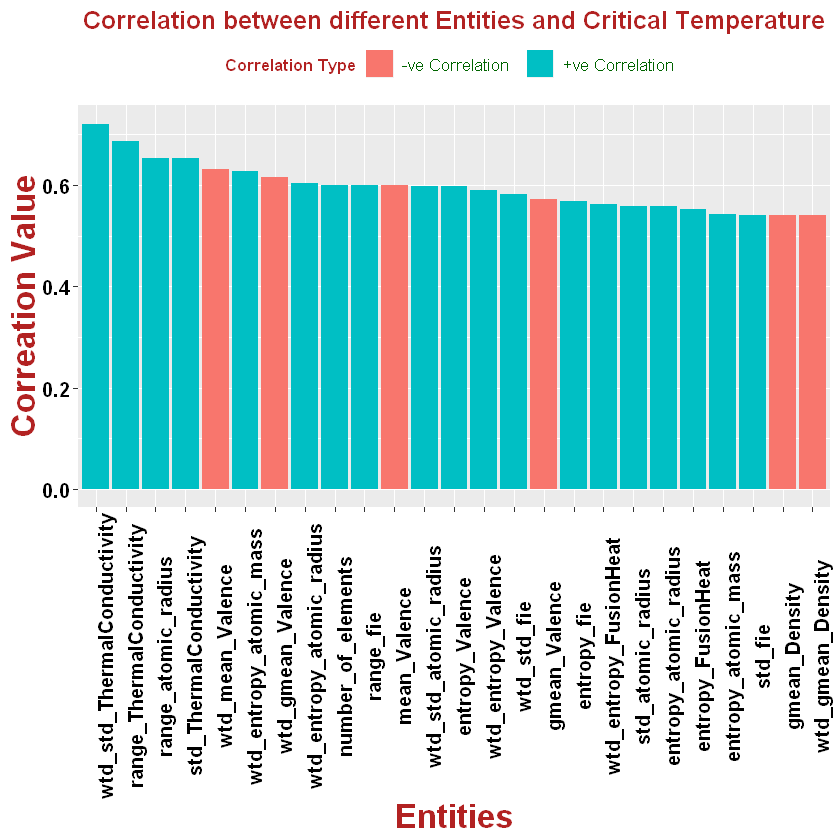

In [14]:
ggplot(data = correlationWithoutCriricalTemp , aes(x= correlationWithoutCriricalTemp$correlationName, y= correlationWithoutCriricalTemp$absoluteCorrelationValue))+
      theme_grey()+ 
      theme(axis.text = element_text(face="bold", color="Black",size=12, angle=90),
            axis.text.y = element_text(angle = 0), 
            axis.title = element_text(face="bold", color="firebrick",size=20),
            strip.text = element_text(size = 20, colour = "DarkGreen",face="bold"),
            legend.title = element_text(size=10, color = "firebrick",face = "bold"), 
            legend.text = element_text(size=10,colour = "DarkGreen"),
            legend.position="top",
            plot.title =  element_text(size=15, color = "firebrick",face = "bold",hjust = .5)) + 
            labs(fill ="Correlation Type" ) +
            xlab("Entities") + ylab("Correation Value")+
            ggtitle("Correlation between different Entities and Critical Temperature")+
            geom_col(aes(fill = correlationWithoutCriricalTemp$correlationSign)
        )


### Extracting a new dataset from the original data set with only the highly correlated columns

In [15]:
newData = data[,levels(correlation$correlationName)]
head(newData)

critical_temp,entropy_atomic_mass,entropy_atomic_radius,entropy_fie,entropy_FusionHeat,entropy_Valence,gmean_Density,gmean_Valence,mean_Valence,number_of_elements,...,wtd_entropy_atomic_mass,wtd_entropy_atomic_radius,wtd_entropy_FusionHeat,wtd_entropy_Valence,wtd_gmean_Density,wtd_gmean_Valence,wtd_mean_Valence,wtd_std_atomic_radius,wtd_std_fie,wtd_std_ThermalConductivity
29,1.181795,1.259244,1.305967,1.088575,1.368922,724.9532,2.213364,2.25,4,...,1.0623955,1.207040,0.9949982,1.066221,53.54381,2.219783,2.257143,69.23557,355.5630,138.5172
26,1.449309,1.508328,1.544145,1.374977,1.557113,1237.0951,1.888175,2.00,5,...,1.0577551,1.204115,1.0730938,1.047221,54.09572,2.210679,2.257143,68.00882,354.9635,139.6309
19,1.181795,1.259244,1.305967,1.088575,1.368922,724.9532,2.213364,2.25,4,...,0.9759805,1.132547,0.9274794,1.029175,53.97402,2.232679,2.271429,67.79771,354.8042,138.5406
22,1.181795,1.259244,1.305967,1.088575,1.368922,724.9532,2.213364,2.25,4,...,1.0222909,1.173033,0.9640310,1.048834,53.75849,2.226222,2.264286,68.52166,355.1839,138.5289
23,1.181795,1.259244,1.305967,1.088575,1.368922,724.9532,2.213364,2.25,4,...,1.1292237,1.261194,1.0449695,1.096052,53.11703,2.206963,2.242857,70.63445,356.3193,138.4937
23,1.181795,1.259244,1.305967,1.088575,1.368922,724.9532,2.213364,2.25,4,...,1.2252028,1.331339,1.1118503,1.141474,52.27364,2.181543,2.214286,73.32413,357.8246,138.4466


Doing a basic analysis on the data

In [16]:
round(describe(newData),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
critical_temp,1,21263,34.421,34.254,20.000,30.314,25.412,0.000,185.000,185.000,0.860,-0.532,0.235
entropy_atomic_mass,2,21263,1.166,0.365,1.200,1.192,0.361,0.000,1.984,1.984,-0.785,0.309,0.003
entropy_atomic_radius,3,21263,1.268,0.375,1.331,1.292,0.351,0.000,2.142,2.142,-0.750,0.384,0.003
entropy_fie,4,21263,1.299,0.382,1.356,1.325,0.384,0.000,2.158,2.158,-0.792,0.397,0.003
entropy_FusionHeat,5,21263,1.093,0.376,1.112,1.114,0.395,0.000,2.034,2.034,-0.579,0.032,0.003
entropy_Valence,6,21263,1.296,0.393,1.369,1.323,0.406,0.000,2.142,2.142,-0.773,0.158,0.003
gmean_Density,7,21263,3460.692,3703.256,1339.975,2830.865,1078.960,1.429,22590.000,22588.571,1.659,3.189,25.396
gmean_Valence,8,21263,3.057,1.046,2.615,2.902,0.662,1.000,7.000,6.000,1.168,0.510,0.007
mean_Valence,9,21263,3.198,1.045,2.833,3.061,0.865,1.000,7.000,6.000,1.003,0.147,0.007
number_of_elements,10,21263,4.115,1.439,4.000,4.106,1.483,1.000,9.000,8.000,0.009,-0.686,0.010


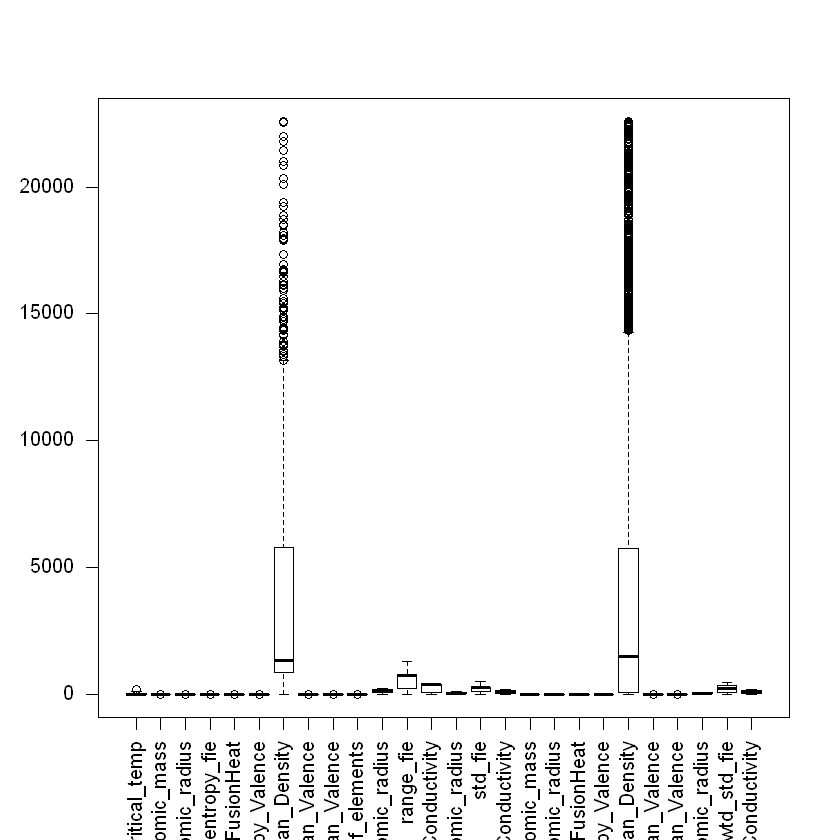

In [17]:
boxplot(newData, las=2, cex.axis = 1)

Now Lets check the correlation between all columns in the new dataset

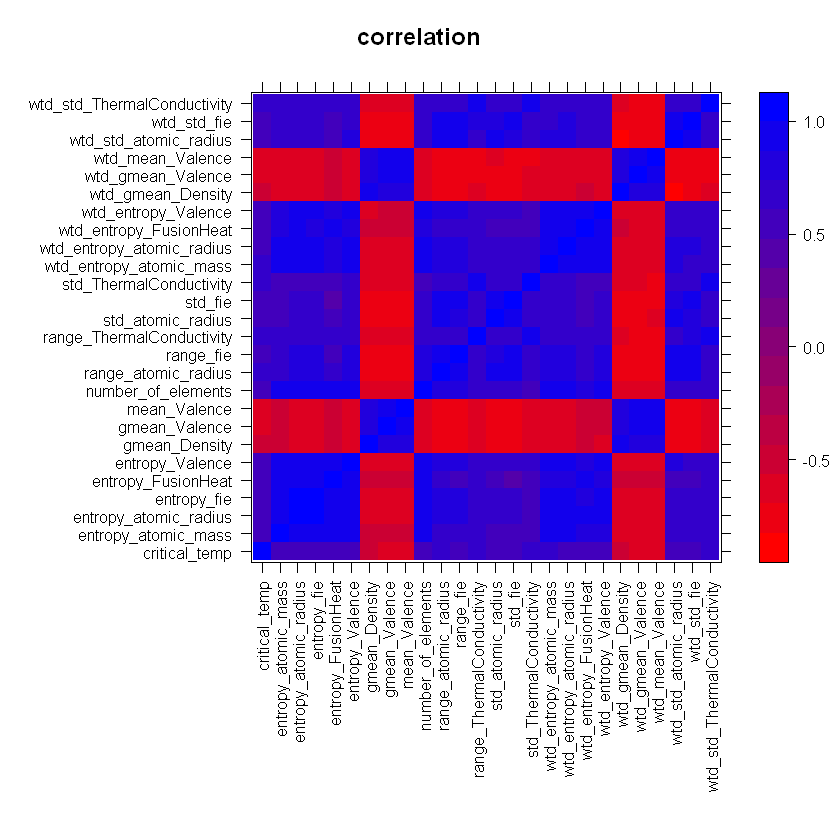

In [18]:
#Define the color scheme
cols = colorRampPalette(c("red","blue"))
#Plot the correlation matrix.
levelplot(cor(newData), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)))

From this plot it looks like most of the columns are highly correlated to each other. So lets try to extract the values with correlation greater than 0.8 or less than 0.8 

In [19]:
used = c('critical_temp')
correlationValues = c()
correlationName = c()
correlationSign = c()
absoluteCorrelationValue = c()
for(entity in names(newData)){
    if(entity == 'critical_temp'){
        next
    }
    used = c(used,entity)
    for(var1 in names(newData)){
        if(is.element(var1, used)){
            next
        }
        if((var1!=entity) &&(cor(data[var1],data[entity])>0.8 || cor(data[var1],data[entity])< -0.8 )){
            corVal <- cor(data[var1],data[entity])
            correlationValues <- c(correlationValues, corVal)
            correlationName <- c(correlationName,paste(var1,":",entity))
            if(corVal > 0){
                correlationSign <- c(correlationSign,"+ve Correlation")
            }
            else{
                correlationSign <- c(correlationSign,"-ve Correlation")
            }
            absoluteCorrelationValue <- c(absoluteCorrelationValue,abs(cor(data[var1],data[entity])))
        }
    }
}
temp = data.frame(correlationName,correlationValues,absoluteCorrelationValue,correlationSign)
newCorrelation = temp[order(-temp$absoluteCorrelationValue),]
newCorrelation

,correlationName,correlationValues,absoluteCorrelationValue,correlationSign
10,entropy_fie : entropy_atomic_radius,0.9977394,0.9977394,+ve Correlation
82,wtd_mean_Valence : wtd_gmean_Valence,0.9949388,0.9949388,+ve Correlation
19,entropy_Valence : entropy_fie,0.9927256,0.9927256,+ve Correlation
43,mean_Valence : gmean_Valence,0.9899105,0.9899105,+ve Correlation
12,entropy_Valence : entropy_atomic_radius,0.9895461,0.9895461,+ve Correlation
64,std_ThermalConductivity : range_ThermalConductivity,0.9878666,0.9878666,+ve Correlation
60,std_fie : range_fie,0.9816283,0.9816283,+ve Correlation
20,number_of_elements : entropy_fie,0.9731953,0.9731953,+ve Correlation
1,entropy_atomic_radius : entropy_atomic_mass,0.9723288,0.9723288,+ve Correlation
13,number_of_elements : entropy_atomic_radius,0.9722452,0.9722452,+ve Correlation


In [20]:
print(paste("So there is about",nrow(newCorrelation),"entries with correlation greater than abs(0.8)"))

[1] "So there is about 83 entries with correlation greater than abs(0.8)"


In [21]:
newCorrelation99 = newCorrelation[newCorrelation$absoluteCorrelationValue > 0.99,]
newCorrelation99

,correlationName,correlationValues,absoluteCorrelationValue,correlationSign
10,entropy_fie : entropy_atomic_radius,0.9977394,0.9977394,+ve Correlation
82,wtd_mean_Valence : wtd_gmean_Valence,0.9949388,0.9949388,+ve Correlation
19,entropy_Valence : entropy_fie,0.9927256,0.9927256,+ve Correlation


In [22]:
print(paste("So there is about",nrow(newCorrelation99),"entries with correlation greater than abs(0.99)"))

[1] "So there is about 3 entries with correlation greater than abs(0.99)"


### Individual Analysis of Top 5 Correlated Variables

In [115]:
top5Columns = c('critical_temp','wtd_std_ThermalConductivity','range_ThermalConductivity','range_atomic_radius',
                'std_ThermalConductivity','wtd_mean_Valence')
top5ColumnsData = data[,top5Columns]

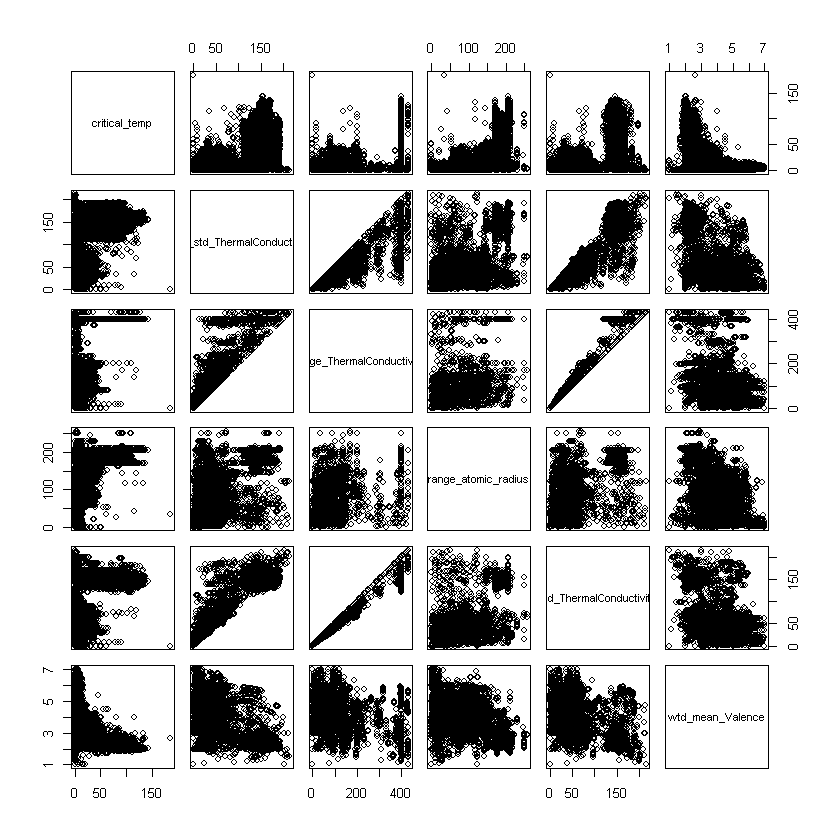

In [116]:
pairs(top5ColumnsData)

From the above plot we can see that some of the columns are linearly correlated to each other

### Checking the internal splitup of the top 5 correlated predictors

### wtd Std Thermal Conductivity

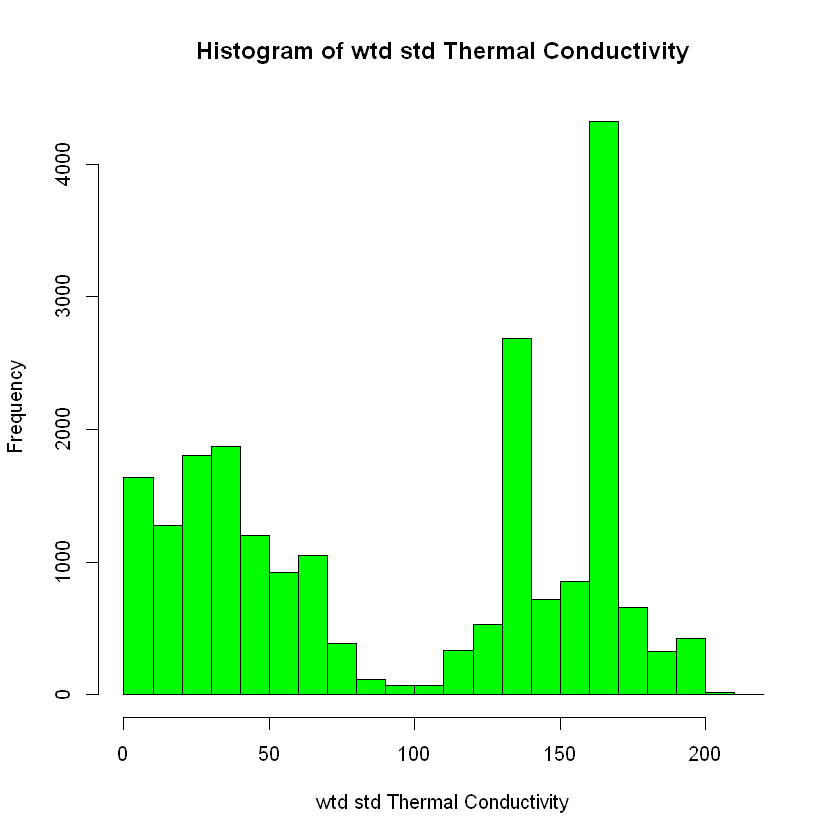

In [23]:
hist(data$wtd_std_ThermalConductivity,col="green",xlab ="wtd std Thermal Conductivity" ,
     main="Histogram of wtd std Thermal Conductivity")

### range Thermal Conductivity

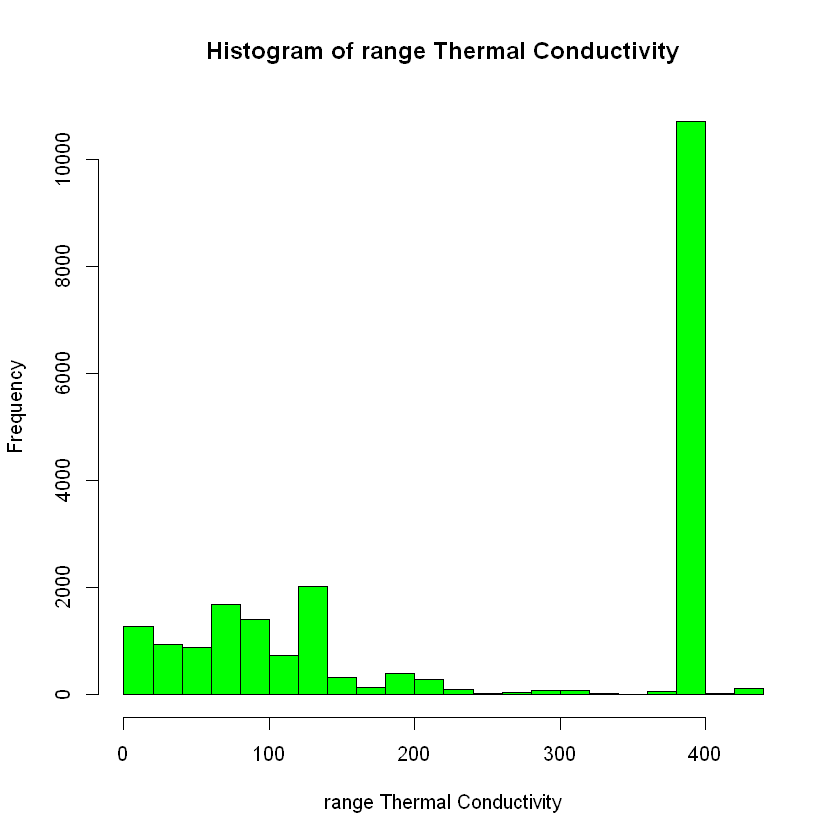

In [24]:
hist(data$range_ThermalConductivity,col="green",xlab ="range Thermal Conductivity" ,
     main="Histogram of range Thermal Conductivity")

### range atomic radius


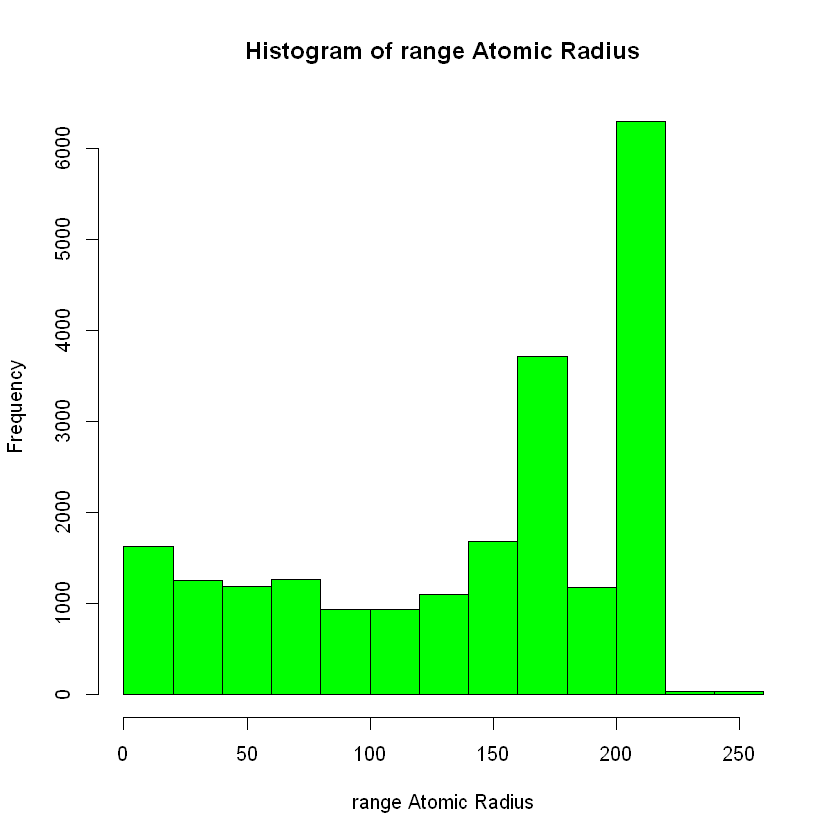

In [25]:
hist(data$range_atomic_radius,col="green",xlab ="range Atomic Radius" ,
     main="Histogram of range Atomic Radius")

### std_ThermalConductivity


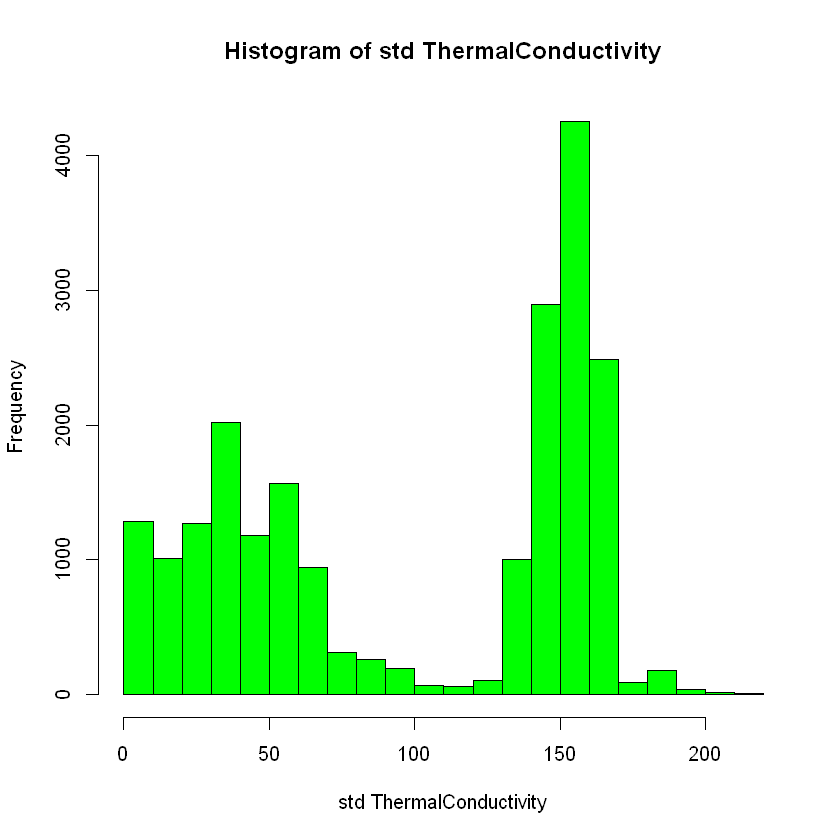

In [26]:
hist(data$std_ThermalConductivity,col="green",xlab ="std ThermalConductivity" ,
     main="Histogram of std ThermalConductivity")

### wtd_mean_Valence

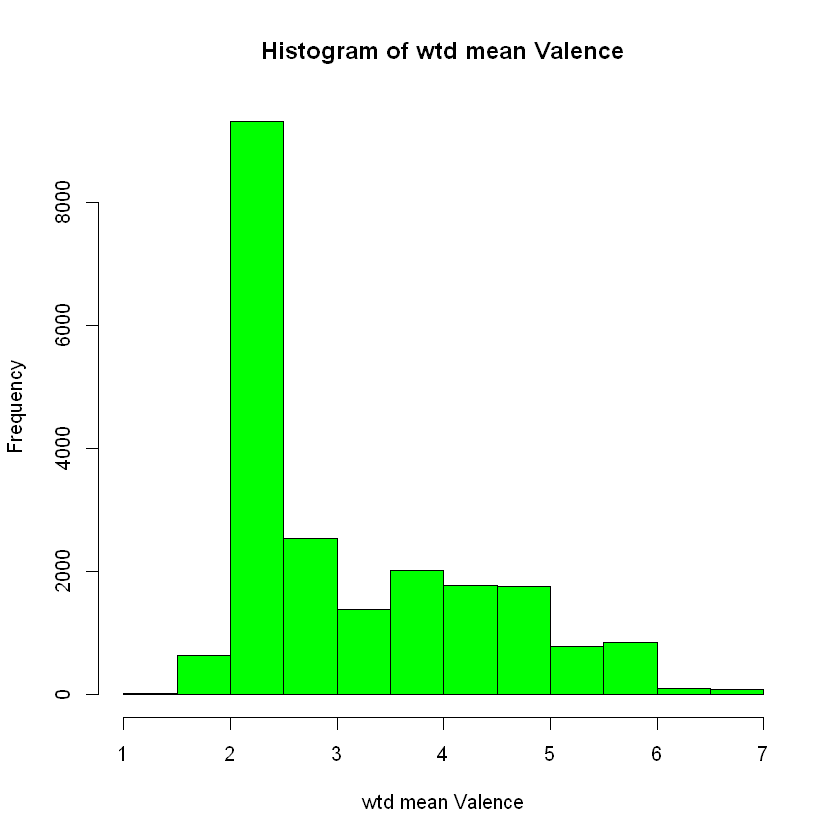

In [27]:
hist(data$wtd_mean_Valence,col="green",xlab ="wtd mean Valence" ,
     main="Histogram of wtd mean Valence")

# Models

## Splitting Data into Training and Test Data

In [28]:
#Splitting the data into 70 percent training and 30 percent test data
sampleSize <- floor(0.70 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
trainIndex <- sample(seq_len(nrow(data)), size = sampleSize)
train <- data[trainIndex, ]
test <- data[-trainIndex, ]

**Checking train data**

In [29]:
describe(train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
number_of_elements,1,14884,4.1158291,1.4396949,4.0000000,4.1051394,1.4826000,1.000000,9.000000,8.000000,0.02308843,-0.66348068,0.011800777
mean_atomic_mass,2,14884,87.3647050,29.5389742,84.8135000,85.7441299,19.5503049,6.941000,208.980400,202.039400,0.74751516,2.08731688,0.242122740
wtd_mean_atomic_mass,3,14884,72.6897101,33.1898236,60.6300009,68.2818970,18.4634745,6.423452,208.980400,202.556948,1.48867426,2.85856107,0.272047735
gmean_atomic_mass,4,14884,71.1173843,30.8033251,66.3615924,67.5347268,15.0587906,5.320573,208.980400,203.659827,1.46718199,3.37767077,0.252486271
wtd_gmean_atomic_mass,5,14884,58.2686201,36.3175172,39.7293639,51.9595490,15.2109207,1.960849,208.980400,207.019551,1.69184563,2.92261689,0.297684567
entropy_atomic_mass,6,14884,1.1660909,0.3650778,1.1995407,1.1929022,0.3617386,0.000000,1.983797,1.983797,-0.78359467,0.31581148,0.002992441
wtd_entropy_atomic_mass,7,14884,1.0635837,0.4008431,1.1426027,1.0922855,0.3759418,0.000000,1.958203,1.958203,-0.62647120,-0.18153365,0.003285600
range_atomic_mass,8,14884,115.5605139,54.5695196,122.9060700,118.6657376,60.5059290,0.000000,207.972460,207.972460,-0.37232667,-0.68296517,0.447291145
wtd_range_atomic_mass,9,14884,33.0425770,26.4968561,26.7171854,28.6455916,16.0298125,0.000000,205.589910,205.589910,2.43034526,8.26366788,0.217187345
std_atomic_mass,10,14884,44.3796910,20.0130003,45.1235000,45.3059567,19.1859557,0.000000,101.019700,101.019700,-0.34437106,-0.44649621,0.164040986


### Initially we will check with all the predictors

In [30]:
fit.all = lm(critical_temp~., data = train)
fit.all.summary = summary(fit.all)
fit.all.summary


Call:
lm(formula = critical_temp ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.935  -9.388   0.552  10.893 169.773 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.372e+01  6.009e+00  -3.947 7.94e-05 ***
number_of_elements              -3.068e+00  8.944e-01  -3.430 0.000605 ***
mean_atomic_mass                 8.091e-01  9.915e-02   8.160 3.61e-16 ***
wtd_mean_atomic_mass            -8.319e-01  1.241e-01  -6.704 2.10e-11 ***
gmean_atomic_mass               -4.412e-01  9.838e-02  -4.485 7.35e-06 ***
wtd_gmean_atomic_mass            5.487e-01  1.179e-01   4.653 3.29e-06 ***
entropy_atomic_mass             -3.890e+01  5.467e+00  -7.116 1.16e-12 ***
wtd_entropy_atomic_mass          6.834e+00  4.328e+00   1.579 0.114373    
range_atomic_mass                2.181e-01  1.979e-02  11.018  < 2e-16 ***
wtd_range_atomic_mass            3.634e-02  2.645e-02   1.374 0.169497    
std_atomic_ma

In [31]:
print(paste("Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))

[1] "Adjusted R-Square: 0.7355"


In [32]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.all.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 81 predictors is been used"


**Lets Check the various Residuals plot**

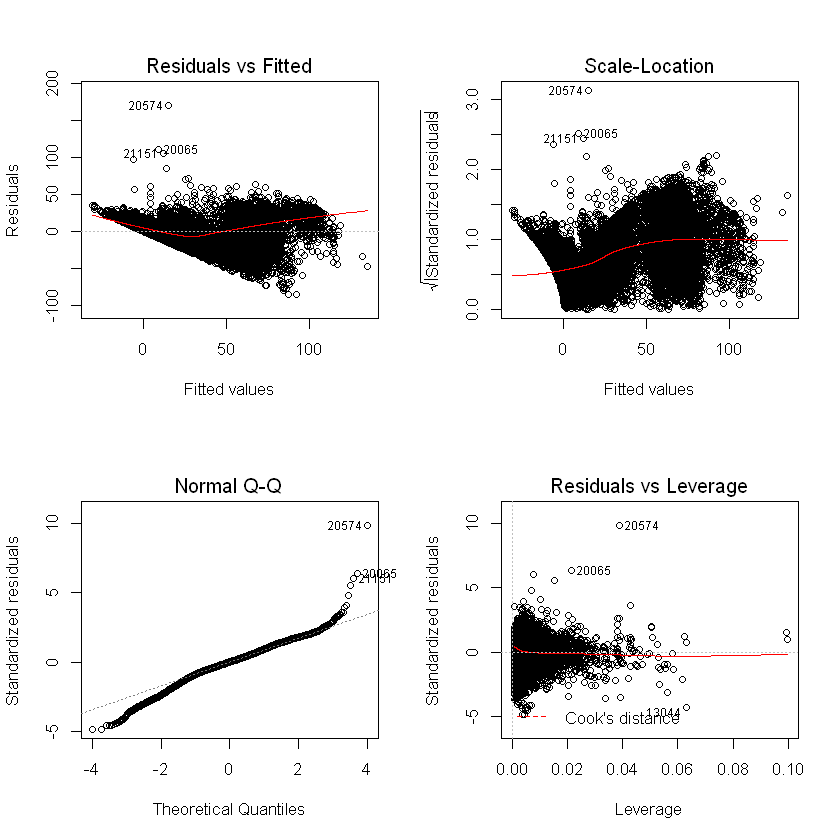

In [33]:
par(mfcol=c(2,2))
plot(fit.all)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Linear FIt just based on the columns Which have higher correlation that is greater than 0.5 or less than -0.5 

In [34]:
levels(correlation$correlationName)

[1] "critical_temp"               "entropy_atomic_mass"        
 [3] "entropy_atomic_radius"       "entropy_fie"                
 [5] "entropy_FusionHeat"          "entropy_Valence"            
 [7] "gmean_Density"               "gmean_Valence"              
 [9] "mean_Valence"                "number_of_elements"         
[11] "range_atomic_radius"         "range_fie"                  
[13] "range_ThermalConductivity"   "std_atomic_radius"          
[15] "std_fie"                     "std_ThermalConductivity"    
[17] "wtd_entropy_atomic_mass"     "wtd_entropy_atomic_radius"  
[19] "wtd_entropy_FusionHeat"      "wtd_entropy_Valence"        
[21] "wtd_gmean_Density"           "wtd_gmean_Valence"          
[23] "wtd_mean_Valence"            "wtd_std_atomic_radius"      
[25] "wtd_std_fie"                 "wtd_std_ThermalConductivity"

In [35]:
newTrain = train[,levels(correlation$correlationName)]
describe(newTrain)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
critical_temp,1,14884,34.4200738,34.2579981,20.0000000,30.2936453,25.3524600,0.0002100,185.000000,184.999790,0.86870904,-0.50808118,0.280803263
entropy_atomic_mass,2,14884,1.1660909,0.3650778,1.1995407,1.1929022,0.3617386,0.0000000,1.983797,1.983797,-0.78359467,0.31581148,0.002992441
entropy_atomic_radius,3,14884,1.2681924,0.3751280,1.3295198,1.2921974,0.3504952,0.0000000,2.141961,2.141961,-0.74564414,0.39804142,0.003074820
entropy_fie,4,14884,1.2995259,0.3814259,1.3544667,1.3253022,0.3817382,0.0000000,2.157777,2.157777,-0.78847544,0.41602799,0.003126442
entropy_FusionHeat,5,14884,1.0946401,0.3760006,1.1120982,1.1152976,0.3954437,0.0000000,2.034410,2.034410,-0.57997263,0.04100390,0.003081972
entropy_Valence,6,14884,1.2961217,0.3929598,1.3689224,1.3231384,0.4085269,0.0000000,2.141963,2.141963,-0.76893413,0.16958641,0.003220982
gmean_Density,7,14884,3455.0483931,3688.0210618,1339.9747016,2830.8116502,1078.9601991,1.4290000,22590.000000,22588.571000,1.66293956,3.25697370,30.229680834
gmean_Valence,8,14884,3.0514286,1.0436272,2.6153210,2.8966508,0.6035632,1.0000000,7.000000,6.000000,1.17361361,0.52311829,0.008554321
mean_Valence,9,14884,3.1924361,1.0422309,2.8333333,3.0541121,0.8648500,1.0000000,7.000000,6.000000,1.01036153,0.15892257,0.008542877
number_of_elements,10,14884,4.1158291,1.4396949,4.0000000,4.1051394,1.4826000,1.0000000,9.000000,8.000000,0.02308843,-0.66348068,0.011800777


In [36]:
fit.correlated = lm(critical_temp~., data = newTrain)
fit.correlated.summary = summary(fit.correlated)
fit.correlated.summary


Call:
lm(formula = critical_temp ~ ., data = newTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.676 -12.678   0.126  12.752 190.625 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2.794e+01  1.703e+00  16.404  < 2e-16 ***
entropy_atomic_mass         -6.009e+01  2.584e+00 -23.257  < 2e-16 ***
entropy_atomic_radius       -3.559e+01  1.520e+01  -2.342  0.01919 *  
entropy_fie                  1.306e+02  1.749e+01   7.467 8.68e-14 ***
entropy_FusionHeat           9.827e+00  2.067e+00   4.753 2.02e-06 ***
entropy_Valence             -6.518e+01  1.302e+01  -5.006 5.61e-07 ***
gmean_Density               -3.850e-03  2.074e-04 -18.567  < 2e-16 ***
gmean_Valence                1.741e+01  4.629e+00   3.760  0.00017 ***
mean_Valence                -1.791e+01  4.631e+00  -3.868  0.00011 ***
number_of_elements          -4.477e+00  8.464e-01  -5.290 1.24e-07 ***
range_atomic_radius          5.441e-01  2.622e-02  20.

In [37]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Highly Correlated Data - Adjusted R-Square:",round(fit.correlated.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Highly Correlated Data - Adjusted R-Square: 0.6461"


Here we can see that the Adjusted R square has been reduced significantly Which indicates the new model might not be a good model

In [38]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.correlated.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 25 predictors is been used"


**Lets Check the various Residuals plot**

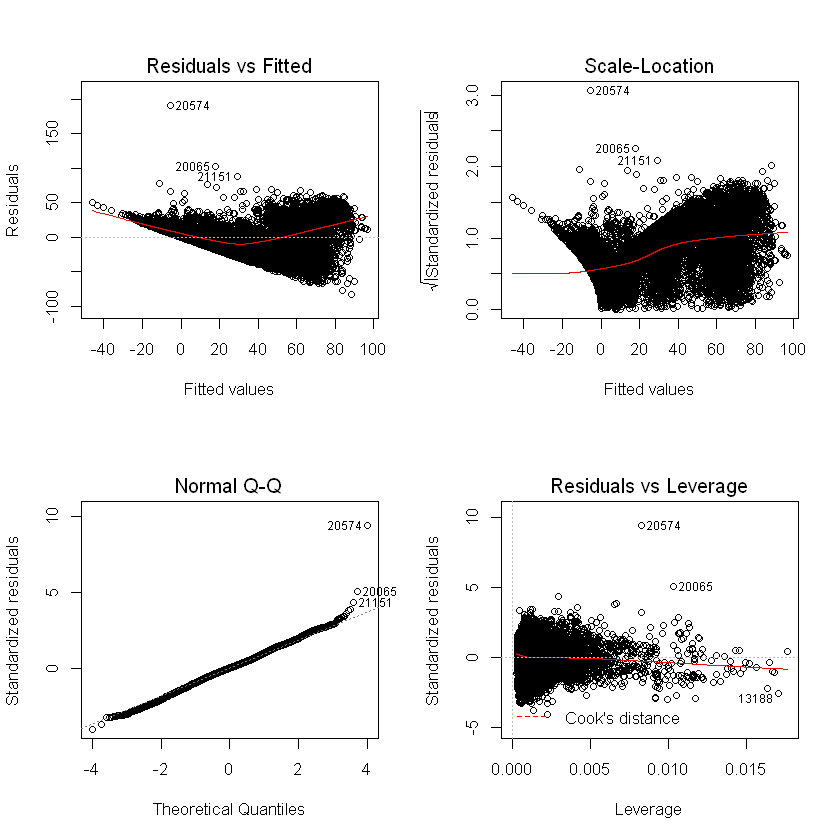

In [39]:
par(mfcol=c(2,2))
plot(fit.correlated)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [40]:
anova(fit.all, fit.correlated)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14858,6170995,-56,-1576097,90.66492,0


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are more correlated as p value is 0. we can also see that in the new fit there is predictors less compared to the original which makes it less complex. But we also see that RSS value has been increased significantly which is very bad. 

Trying to Add the top 3 inter correlated columns that we found earlier and checking its adjusted rsquare val

In [117]:
summary(update(fit.correlated, . ~ . + entropy_fie:entropy_atomic_radius + wtd_mean_Valence:wtd_gmean_Valence + entropy_Valence:entropy_fie))


Call:
lm(formula = critical_temp ~ entropy_atomic_mass + entropy_atomic_radius + 
    entropy_fie + entropy_FusionHeat + entropy_Valence + gmean_Density + 
    gmean_Valence + mean_Valence + number_of_elements + range_atomic_radius + 
    range_fie + range_ThermalConductivity + std_atomic_radius + 
    std_fie + std_ThermalConductivity + wtd_entropy_atomic_mass + 
    wtd_entropy_atomic_radius + wtd_entropy_FusionHeat + wtd_entropy_Valence + 
    wtd_gmean_Density + wtd_gmean_Valence + wtd_mean_Valence + 
    wtd_std_atomic_radius + wtd_std_fie + wtd_std_ThermalConductivity + 
    entropy_atomic_radius:entropy_fie + wtd_gmean_Valence:wtd_mean_Valence + 
    entropy_fie:entropy_Valence, data = newTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.726 -12.302  -0.029  12.618 200.864 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.213e+01  4.619e+00   9.120  < 2e-16 ***
entropy_atomic_mass   

Still the adjusted R square val is significantly low compared to all predictors list. So we can ignore this model

### Linear Fit by taking only the relevant columns based on the no of starts that is based on the p value

In [41]:
fit.starred = lm(critical_temp~.-wtd_entropy_atomic_mass
                -wtd_range_atomic_mass
                -wtd_std_atomic_mass
                -wtd_std_fie
                -gmean_atomic_radius
                -wtd_mean_Density
                -wtd_range_Density
                -mean_ElectronAffinity
                -entropy_ElectronAffinity
                -std_FusionHeat
                -mean_ThermalConductivity
                -wtd_entropy_ThermalConductivity
                -wtd_std_ThermalConductivity
                -wtd_range_Valence, data = train)
fit.starred.summary = summary(fit.starred)

In [42]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.starred.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 67 predictors is been used"


In [43]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Starred Data - Adjusted R-Square:",round(fit.starred.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Starred Data - Adjusted R-Square: 0.7353"


Here we can see that the adjusted R-square is decreased but only for a small amount which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**

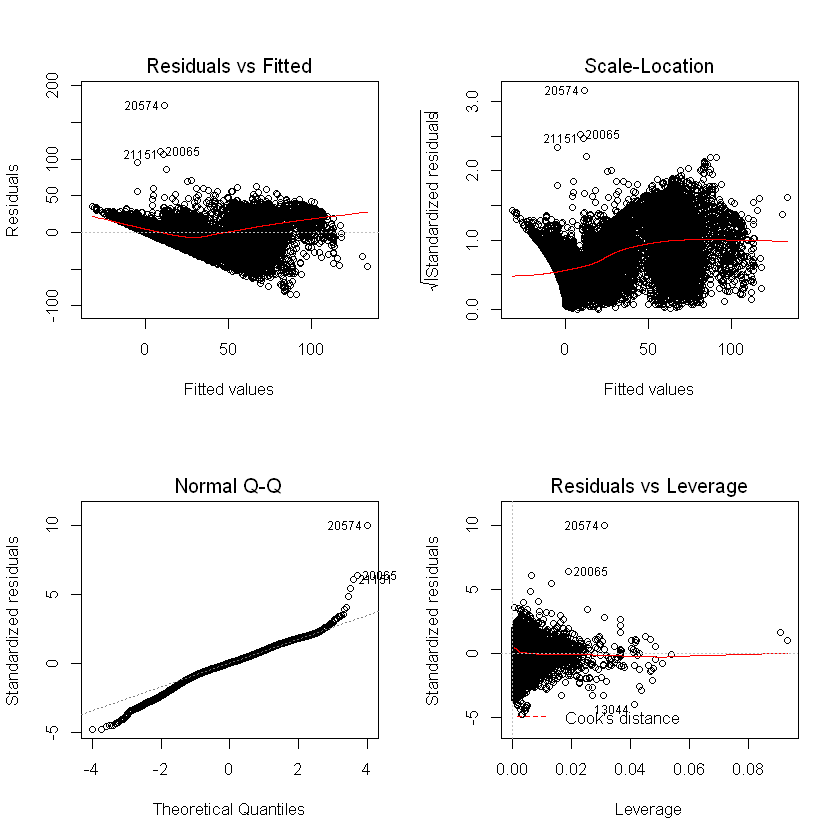

In [44]:
par(mfcol=c(2,2))
plot(fit.starred)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function


In [45]:
anova(fit.all, fit.starred)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14816,4602237,-14,-7338.493,1.688587,0.0507471


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are more correlated as p value is approx 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

### Generating a linear Fit using forward step function

In [46]:
fit.step.forward = step(lm(critical_temp~1 , data = train),direction = "forward",scope=formula(lm(critical_temp~.,train)))
fit.step.forward.summary <-summary(fit.step.forward)
fit.step.forward.summary

Start:  AIC=105198.7
critical_temp ~ 1

                                  Df Sum of Sq      RSS    AIC
+ wtd_std_ThermalConductivity      1   8987862  8478982  94444
+ range_ThermalConductivity        1   8153369  9313475  95841
+ range_atomic_radius              1   7408660 10058184  96986
+ std_ThermalConductivity          1   7343367 10123477  97082
+ wtd_mean_Valence                 1   6924525 10542319  97686
+ wtd_entropy_atomic_mass          1   6846383 10620461  97796
+ wtd_gmean_Valence                1   6562183 10904661  98189
+ wtd_entropy_atomic_radius        1   6354133 11112712  98470
+ number_of_elements               1   6335866 11130978  98494
+ range_fie                        1   6316153 11150692  98521
+ entropy_Valence                  1   6250852 11215992  98608
+ mean_Valence                     1   6190097 11276747  98688
+ wtd_std_atomic_radius            1   6175168 11291676  98708
+ wtd_entropy_Valence              1   6105998 11360846  98799
+ wtd_std_fie  


Call:
lm(formula = critical_temp ~ wtd_std_ThermalConductivity + gmean_ElectronAffinity + 
    range_atomic_radius + std_atomic_radius + entropy_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + wtd_std_Valence + wtd_entropy_atomic_mass + 
    wtd_entropy_Density + range_atomic_mass + wtd_std_atomic_mass + 
    wtd_entropy_ThermalConductivity + range_Density + range_ThermalConductivity + 
    gmean_ThermalConductivity + wtd_entropy_ElectronAffinity + 
    wtd_mean_ThermalConductivity + wtd_gmean_ThermalConductivity + 
    wtd_entropy_FusionHeat + wtd_range_Valence + wtd_std_ElectronAffinity + 
    wtd_mean_ElectronAffinity + std_ElectronAffinity + range_ElectronAffinity + 
    wtd_range_ThermalConductivity + wtd_std_atomic_radius + entropy_atomic_mass + 
    wtd_std_FusionHeat + wtd_entropy_fie + range_Valence + wtd_entropy_Valence + 
    wtd_range_FusionHeat + std_ThermalConductivity + wtd_range_ElectronAffinity + 
    wtd_range_fie + mean_ElectronAffinity + wtd_range_Density + 
 

In [47]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.step.forward.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 77 predictors is been used"


In [48]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Step Forward Data - Adjusted R-Square:",round(fit.step.forward.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Step Forward Data - Adjusted R-Square: 0.7354"


Here we can see that the adjusted R-square is decreased but only for a small amount which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**

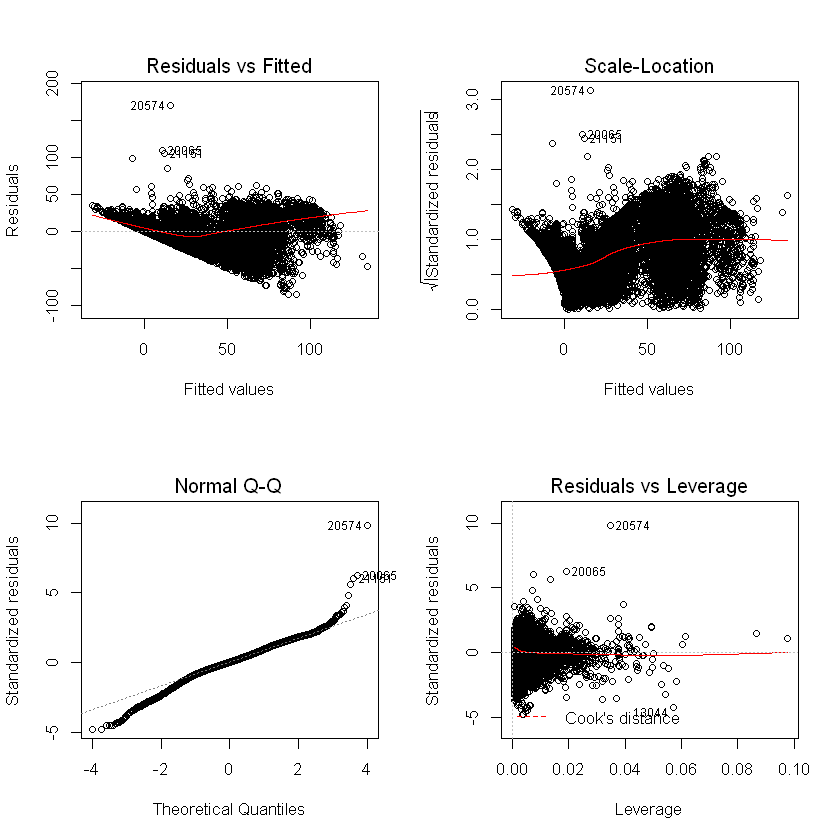

In [49]:
par(mfcol=c(2,2))
plot(fit.step.forward)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [50]:
anova(fit.all, fit.step.forward)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14806,4597847,-4,-2948.009,2.374178,0.04986433


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are more correlated as p value is less than 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

### Generating a linear Fit using backward step function

In [51]:
fit.step.backward = step(lm(critical_temp~. , data = train),direction = "backward")
fit.step.backward.summary <-summary(fit.step.backward)
fit.step.backward.summary

Start:  AIC=85485.27
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    mean_fie + wtd_mean_fie + gmean_fie + wtd_gmean_fie + entropy_fie + 
    wtd_entropy_fie + range_fie + wtd_range_fie + std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + wtd_gmean_atomic_radius + entropy_atomic_radius + 
    wtd_entropy_atomic_radius + range_atomic_radius + wtd_range_atomic_radius + 
    std_atomic_radius + wtd_std_atomic_radius + mean_Density + 
    gmean_Density + wtd_gmean_Density + entropy_Density + wtd_entropy_Density + 
    range_Density + std_Density + wtd_std_Density + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entropy_ElectronAffinity + 
    wtd_entropy_ElectronAffinity + range_ElectronAffinity + wtd_range_ElectronAffinity + 
    std_ElectronAffinity + wtd_std_ElectronAffinity + mean_FusionHea

In [52]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.step.backward.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 70 predictors is been used"


In [53]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Step Backward Data - Adjusted R-Square:",round(fit.step.backward.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Step Backward Data - Adjusted R-Square: 0.7355"


Here we can see that the adjusted R-square is almost equal which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**

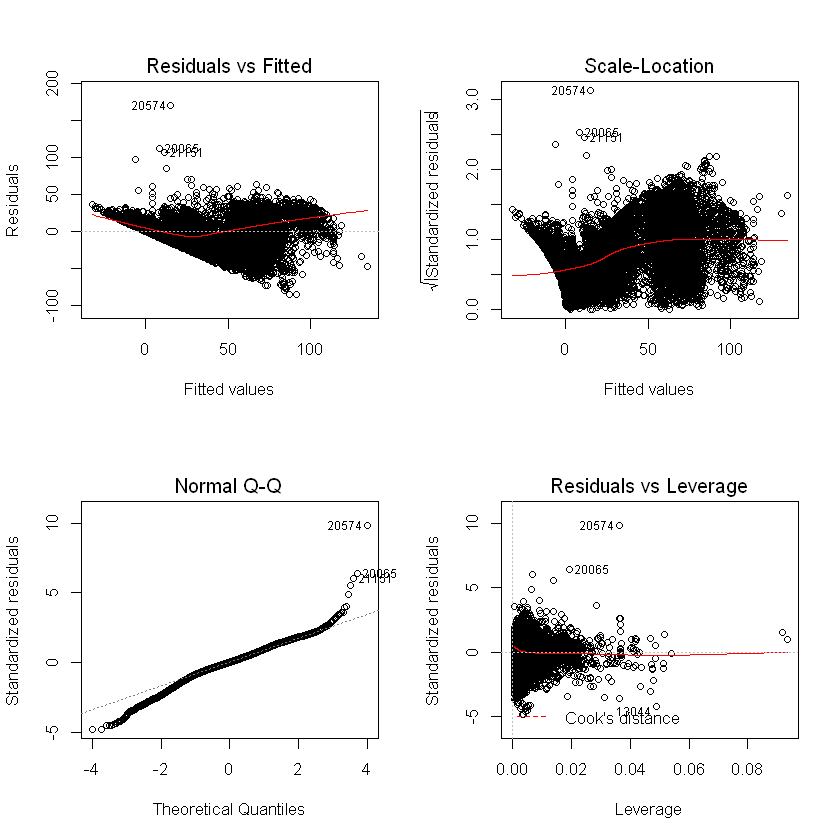

In [54]:
par(mfcol=c(2,2))
plot(fit.step.backward)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [55]:
anova(fit.all, fit.step.backward)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14813,4598388,-11,-3488.991,1.021766,0.4234977


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are not much  correlated as p value is greater than 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

We Know that step is done by finding least AIC value. But a better model can also be found using other factors similar to AIC like BIC etc

### Performing best subset selection

### Using forward Selection

In [56]:
fit.reg.forward <- regsubsets(critical_temp ~ ., data = train, nvmax = 81, method = "forward")
fit.reg.forward.summary <- summary(fit.reg.forward)
fit.reg.forward.summary

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., data = train, nvmax = 81, 
    method = "forward")
81 Variables  (and intercept)
                                Forced in Forced out
number_of_elements                  FALSE      FALSE
mean_atomic_mass                    FALSE      FALSE
wtd_mean_atomic_mass                FALSE      FALSE
gmean_atomic_mass                   FALSE      FALSE
wtd_gmean_atomic_mass               FALSE      FALSE
entropy_atomic_mass                 FALSE      FALSE
wtd_entropy_atomic_mass             FALSE      FALSE
range_atomic_mass                   FALSE      FALSE
wtd_range_atomic_mass               FALSE      FALSE
std_atomic_mass                     FALSE      FALSE
wtd_std_atomic_mass                 FALSE      FALSE
mean_fie                            FALSE      FALSE
wtd_mean_fie                        FALSE      FALSE
gmean_fie                           FALSE      FALSE
wtd_gmean_fie                       FALSE      FALSE
ent

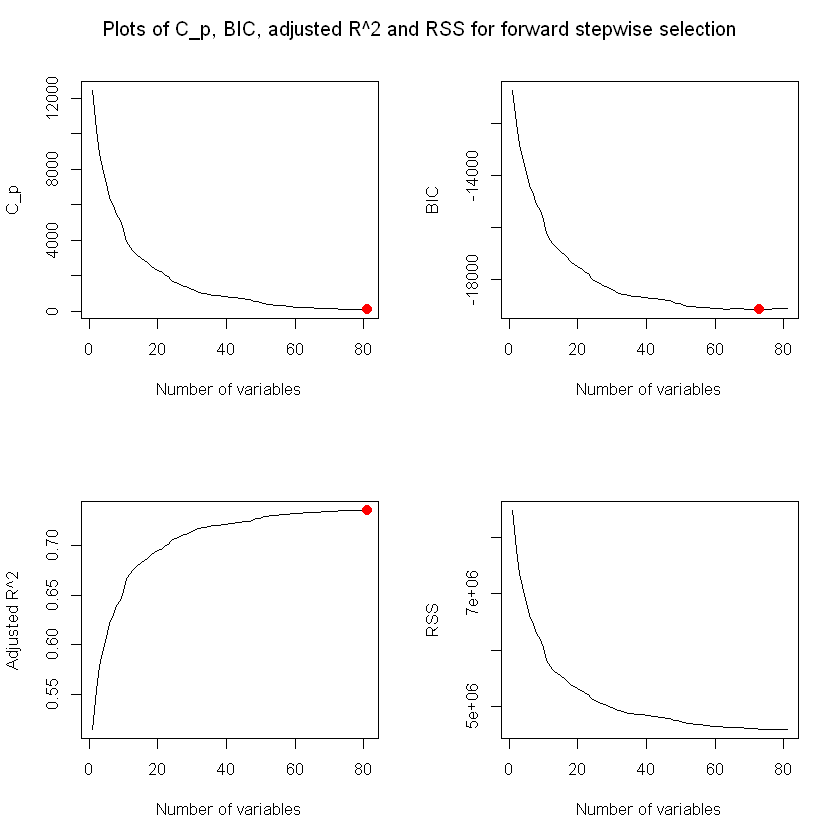

In [57]:
par(mfrow = c(2, 2))
plot(fit.reg.forward.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(fit.reg.forward.summary$cp), fit.reg.forward.summary$cp[which.min(fit.reg.forward.summary$cp)], col = "red", cex = 2, pch = 20)
plot(fit.reg.forward.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(fit.reg.forward.summary$bic), fit.reg.forward.summary$bic[which.min(fit.reg.forward.summary$bic)], col = "red", cex = 2, pch = 20)
plot(fit.reg.forward.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(fit.reg.forward.summary$adjr2), fit.reg.forward.summary$adjr2[which.max(fit.reg.forward.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(fit.reg.forward.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

**BIC** (or Bayesian information criteria) is a variant of AIC with a stronger penalty for including additional variables to the model.We know that lesser the value of BIC better the model 

In [58]:
print(paste("we can see that min value of BIC was found in a model with", which.min(fit.reg.forward.summary$bic),"predictors"))

[1] "we can see that min value of BIC was found in a model with 73 predictors"


We also know that bigger the value of adjusted R square better the model 

In [59]:
print(paste("we can see that max value of Adjusted R Square was found in a model with", 
            which.max(fit.reg.forward.summary$adjr2),"predictors"))

[1] "we can see that max value of Adjusted R Square was found in a model with 81 predictors"


**Mallows Cp**: A variant of AIC developed by Colin Mallows. We also Know that the smaller the value of Cp better the model

In [60]:
print(paste("we can see that max value of Cp was found in a model with", which.min(fit.reg.forward.summary$cp),"predictors"))

[1] "we can see that max value of Cp was found in a model with 81 predictors"


Here we can see that based on both Cp and Adjusted R2 the best model should have 81 predicates. Which is same as the all predictors model

So lets analyse the case with lowet BIC that is the model with 73 predictors

In [61]:
fBicSelectedColumns = names(coef(fit.reg.forward,73))
# Chang in the value of '(Intercept) to critical_temp
fBicSelectedColumns[1] = 'critical_temp'
fBicSelectedColumns

[1] "critical_temp"                   "number_of_elements"             
 [3] "mean_atomic_mass"                "wtd_mean_atomic_mass"           
 [5] "gmean_atomic_mass"               "wtd_gmean_atomic_mass"          
 [7] "entropy_atomic_mass"             "wtd_entropy_atomic_mass"        
 [9] "range_atomic_mass"               "std_atomic_mass"                
[11] "wtd_std_atomic_mass"             "wtd_gmean_fie"                  
[13] "entropy_fie"                     "wtd_entropy_fie"                
[15] "range_fie"                       "wtd_range_fie"                  
[17] "std_fie"                         "wtd_std_fie"                    
[19] "wtd_mean_atomic_radius"          "gmean_atomic_radius"            
[21] "wtd_gmean_atomic_radius"         "entropy_atomic_radius"          
[23] "wtd_entropy_atomic_radius"       "range_atomic_radius"            
[25] "wtd_range_atomic_radius"         "std_atomic_radius"              
[27] "wtd_std_atomic_radius"           "mean_Density"                   
[29] "wtd_mean_Density"                "gmean_Density"                  
[31] "wtd_gmean_Density"               "entropy_Density"                
[33] "wtd_entropy_Density"             "range_Density"                  
[35] "wtd_range_Density"               "std_Density"                    
[37] "wtd_std_Density"                 "mean_ElectronAffinity"          
[39] "wtd_mean_ElectronAffinity"       "gmean_ElectronAffinity"         
[41] "wtd_gmean_ElectronAffinity"      "entropy_ElectronAffinity"       
[43] "wtd_entropy_ElectronAffinity"    "range_ElectronAffinity"         
[45] "wtd_range_ElectronAffinity"      "std_ElectronAffinity"           
[47] "wtd_std_ElectronAffinity"        "mean_FusionHeat"                
[49] "wtd_mean_FusionHeat"             "gmean_FusionHeat"               
[51] "wtd_gmean_FusionHeat"            "entropy_FusionHeat"             
[53] "wtd_entropy_FusionHeat"          "range_FusionHeat"               
[55] "wtd_range_FusionHeat"            "std_FusionHeat"                 
[57] "wtd_std_FusionHeat"              "mean_ThermalConductivity"       
[59] "wtd_mean_ThermalConductivity"    "gmean_ThermalConductivity"      
[61] "wtd_gmean_ThermalConductivity"   "entropy_ThermalConductivity"    
[63] "wtd_entropy_ThermalConductivity" "range_ThermalConductivity"      
[65] "wtd_range_ThermalConductivity"   "std_ThermalConductivity"        
[67] "wtd_std_ThermalConductivity"     "gmean_Valence"                  
[69] "wtd_gmean_Valence"               "entropy_Valence"                
[71] "wtd_entropy_Valence"             "range_Valence"                  
[73] "wtd_range_Valence"               "wtd_std_Valence"

In [62]:
fBicTrain = train[,fBicSelectedColumns]
head(fBicTrain)

,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,std_atomic_mass,...,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
18847,24.0,6,60.60051,71.50999,46.72851,55.49176,1.5674431,1.219687,122.90607,40.99217,...,19.50236,39.04048,31.20671,2.667168,3.024633,1.692020,1.3798055,4,1.2375000,1.1334542
18895,15.5,4,57.44445,60.35930,56.06791,58.81637,1.3627753,1.035615,34.84360,12.36749,...,38.80000,56.41531,55.72000,3.309751,3.405193,1.333736,0.9933449,3,1.9520000,1.1989395
2986,45.3,6,84.71115,78.84015,66.61372,64.69108,1.6109227,1.503995,122.90607,47.66921,...,171.42477,142.36947,182.20585,2.139826,2.119268,1.778233,1.5841000,1,0.7428571,0.3499271
1842,94.0,7,112.95469,60.86673,82.42970,36.81151,1.7077125,1.706145,192.98100,74.49495,...,53.31916,138.42313,136.63725,2.667097,2.256988,1.874063,1.5394896,3,1.0266667,0.9572820
3371,74.1,6,78.67813,59.21927,58.87964,36.12306,1.5198817,1.376040,192.98100,62.21946,...,53.05249,141.79970,137.31896,2.492883,2.260508,1.717076,1.3702158,3,1.0646667,1.0198691
11638,12.9,3,49.59452,37.84410,37.11177,24.83395,0.8757052,0.877500,76.89515,31.41607,...,81.36000,56.84091,59.54024,3.634241,3.690431,1.090060,0.8829809,1,1.9200000,0.4489989


In [63]:
fit.reg.f.bic = lm(critical_temp~., data = fBicTrain)
fit.reg.f.bic.summary = summary(fit.reg.f.bic)
fit.reg.f.bic.summary


Call:
lm(formula = critical_temp ~ ., data = fBicTrain)

Residuals:
   Min     1Q Median     3Q    Max 
-84.10  -9.36   0.52  10.82 169.94 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.559e+01  5.491e+00  -4.661 3.18e-06 ***
number_of_elements              -2.875e+00  8.824e-01  -3.258 0.001123 ** 
mean_atomic_mass                 7.188e-01  9.527e-02   7.544 4.82e-14 ***
wtd_mean_atomic_mass            -6.917e-01  1.177e-01  -5.875 4.33e-09 ***
gmean_atomic_mass               -3.679e-01  9.345e-02  -3.937 8.29e-05 ***
wtd_gmean_atomic_mass            4.410e-01  1.118e-01   3.944 8.05e-05 ***
entropy_atomic_mass             -3.843e+01  5.267e+00  -7.296 3.11e-13 ***
wtd_entropy_atomic_mass          3.554e+00  3.899e+00   0.912 0.362043    
range_atomic_mass                2.130e-01  1.939e-02  10.984  < 2e-16 ***
std_atomic_mass                 -5.076e-01  7.269e-02  -6.983 3.02e-12 ***
wtd_std_atomic_mass

In [64]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.reg.f.bic.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 73 predictors is been used"


In [65]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.reg.f.bic.summary$adj.r.squared,4)))
print(paste("Based on Min BIC Val - Adjusted R-Square:",round(fit.reg.f.bic.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7352"
[1] "Based on Min BIC Val - Adjusted R-Square: 0.7352"


Here we can see that the adjusted R-square is decreased but only for a small amount which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**

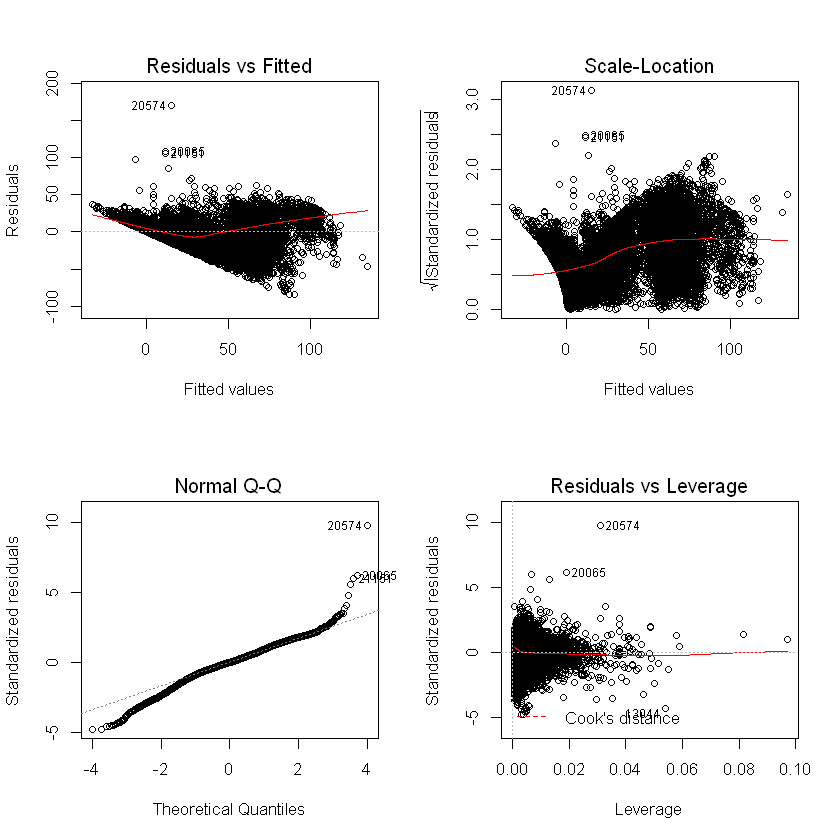

In [66]:
par(mfcol=c(2,2))
plot(fit.reg.f.bic)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [67]:
anova(fit.all, fit.reg.f.bic)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14810,4601730,-8,-6831.795,2.750992,0.004923194


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are more correlated as p value is less than 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

### Using Backward Selection

In [68]:
fit.reg.backward <- regsubsets(critical_temp ~ ., data = train, nvmax = 81, method = "backward")
fit.reg.backward.summary <- summary(fit.reg.backward)
fit.reg.backward.summary

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., data = train, nvmax = 81, 
    method = "backward")
81 Variables  (and intercept)
                                Forced in Forced out
number_of_elements                  FALSE      FALSE
mean_atomic_mass                    FALSE      FALSE
wtd_mean_atomic_mass                FALSE      FALSE
gmean_atomic_mass                   FALSE      FALSE
wtd_gmean_atomic_mass               FALSE      FALSE
entropy_atomic_mass                 FALSE      FALSE
wtd_entropy_atomic_mass             FALSE      FALSE
range_atomic_mass                   FALSE      FALSE
wtd_range_atomic_mass               FALSE      FALSE
std_atomic_mass                     FALSE      FALSE
wtd_std_atomic_mass                 FALSE      FALSE
mean_fie                            FALSE      FALSE
wtd_mean_fie                        FALSE      FALSE
gmean_fie                           FALSE      FALSE
wtd_gmean_fie                       FALSE      FALSE
en

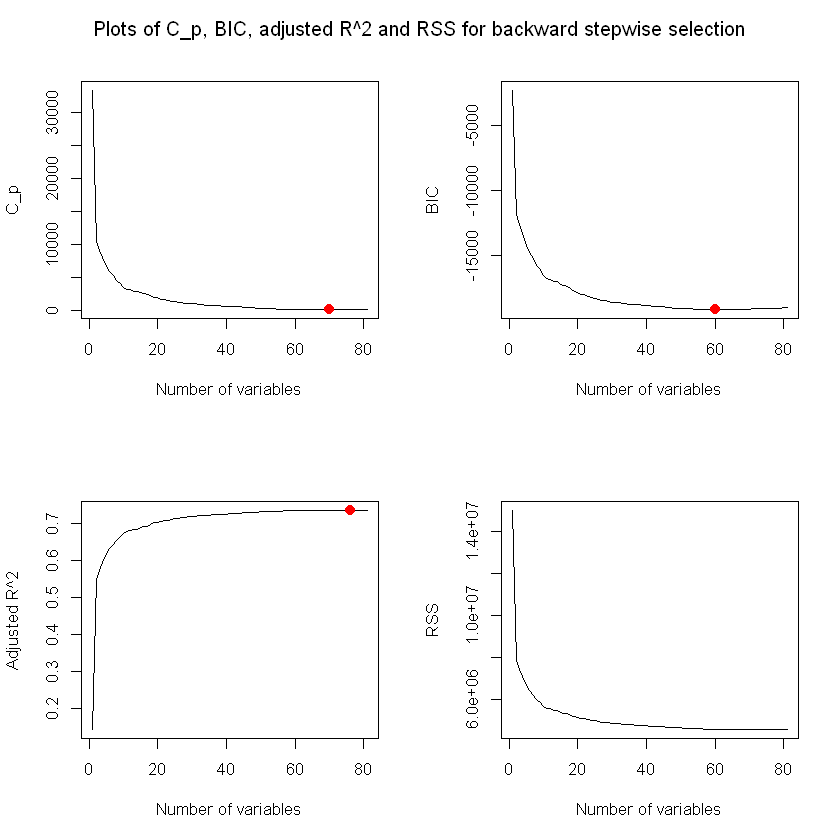

In [69]:
par(mfrow = c(2, 2))
plot(fit.reg.backward.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(fit.reg.backward.summary$cp), fit.reg.backward.summary$cp[which.min(fit.reg.backward.summary$cp)], col = "red", cex = 2, pch = 20)
plot(fit.reg.backward.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(fit.reg.backward.summary$bic), fit.reg.backward.summary$bic[which.min(fit.reg.backward.summary$bic)], col = "red", cex = 2, pch = 20)
plot(fit.reg.backward.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(fit.reg.backward.summary$adjr2), fit.reg.backward.summary$adjr2[which.max(fit.reg.backward.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(fit.reg.backward.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

**BIC** (or Bayesian information criteria) is a variant of AIC with a stronger penalty for including additional variables to the model.We know that lesser the value of BIC better the model 


In [70]:
print(paste("we can see that min value of BIC was found in a model with", which.min(fit.reg.backward.summary$bic),"predictors"))


[1] "we can see that min value of BIC was found in a model with 60 predictors"


We also know that bigger the value of adjusted R square better the model 

In [71]:
print(paste("we can see that max value of Adjusted R Square was found in a model with", 
            which.max(fit.reg.backward.summary$adjr2),"predictors"))

[1] "we can see that max value of Adjusted R Square was found in a model with 76 predictors"


**Mallows Cp**: A variant of AIC developed by Colin Mallows. We also Know that the smaller the value of Cp better the model


In [72]:
print(paste("we can see that max value of Cp was found in a model with", which.min(fit.reg.backward.summary$cp),"predictors"))

[1] "we can see that max value of Cp was found in a model with 70 predictors"


Here we can see that all of them have different no of predictors. So lets start from analysing the best model based on BIC ie 60 predictors

**based on BIC**

In [73]:
bBicSelectedColumns = names(coef(fit.reg.backward,60))
# Chang in the value of '(Intercept) to critical_temp
bBicSelectedColumns[1] = 'critical_temp'
bBicSelectedColumns

[1] "critical_temp"                 "number_of_elements"           
 [3] "mean_atomic_mass"              "wtd_mean_atomic_mass"         
 [5] "gmean_atomic_mass"             "wtd_gmean_atomic_mass"        
 [7] "entropy_atomic_mass"           "range_atomic_mass"            
 [9] "std_atomic_mass"               "mean_fie"                     
[11] "wtd_mean_fie"                  "gmean_fie"                    
[13] "wtd_gmean_fie"                 "entropy_fie"                  
[15] "wtd_entropy_fie"               "range_fie"                    
[17] "wtd_range_fie"                 "std_fie"                      
[19] "mean_atomic_radius"            "wtd_mean_atomic_radius"       
[21] "wtd_gmean_atomic_radius"       "entropy_atomic_radius"        
[23] "wtd_entropy_atomic_radius"     "range_atomic_radius"          
[25] "wtd_range_atomic_radius"       "std_atomic_radius"            
[27] "mean_Density"                  "wtd_gmean_Density"            
[29] "entropy_Density"               "wtd_entropy_Density"          
[31] "range_Density"                 "std_Density"                  
[33] "wtd_mean_ElectronAffinity"     "gmean_ElectronAffinity"       
[35] "wtd_gmean_ElectronAffinity"    "wtd_entropy_ElectronAffinity" 
[37] "range_ElectronAffinity"        "wtd_range_ElectronAffinity"   
[39] "std_ElectronAffinity"          "wtd_std_ElectronAffinity"     
[41] "mean_FusionHeat"               "wtd_mean_FusionHeat"          
[43] "gmean_FusionHeat"              "wtd_gmean_FusionHeat"         
[45] "entropy_FusionHeat"            "wtd_entropy_FusionHeat"       
[47] "range_FusionHeat"              "wtd_range_FusionHeat"         
[49] "wtd_mean_ThermalConductivity"  "gmean_ThermalConductivity"    
[51] "wtd_gmean_ThermalConductivity" "entropy_ThermalConductivity"  
[53] "range_ThermalConductivity"     "wtd_range_ThermalConductivity"
[55] "std_ThermalConductivity"       "gmean_Valence"                
[57] "wtd_gmean_Valence"             "entropy_Valence"              
[59] "wtd_entropy_Valence"           "range_Valence"                
[61] "wtd_std_Valence"

In [74]:
bBicTrain = train[,bBicSelectedColumns]
head(bBicTrain)

,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,...,entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_std_Valence
18847,24.0,6,60.60051,71.50999,46.72851,55.49176,1.5674431,122.90607,40.99217,999.6000,...,1.2155209,99.97342,19.50236,39.04048,2.667168,3.024633,1.692020,1.3798055,4,1.1334542
18895,15.5,4,57.44445,60.35930,56.06791,58.81637,1.3627753,34.84360,12.36749,763.2000,...,1.2573357,150.00000,38.80000,56.41531,3.309751,3.405193,1.333736,0.9933449,3,1.1989395
2986,45.3,6,84.71115,78.84015,66.61372,64.69108,1.6109227,122.90607,47.66921,759.7167,...,1.1150210,399.97342,171.42477,142.36947,2.139826,2.119268,1.778233,1.5841000,1,0.3499271
1842,94.0,7,112.95469,60.86673,82.42970,36.81151,1.7077125,192.98100,74.49495,742.2286,...,1.1122960,399.97342,53.31916,138.42313,2.667097,2.256988,1.874063,1.5394896,3,0.9572820
3371,74.1,6,78.67813,59.21927,58.87964,36.12306,1.5198817,192.98100,62.21946,776.4167,...,1.1218586,399.97342,53.05249,141.79970,2.492883,2.260508,1.717076,1.3702158,3,1.0198691
11638,12.9,3,49.59452,37.84410,37.11177,24.83395,0.8757052,76.89515,31.41607,786.3000,...,0.6734333,123.00000,81.36000,56.84091,3.634241,3.690431,1.090060,0.8829809,1,0.4489989


In [75]:
fit.reg.b.bic = lm(critical_temp~., data = bBicTrain)
fit.reg.b.bic.summary = summary(fit.reg.b.bic)
fit.reg.b.bic.summary


Call:
lm(formula = critical_temp ~ ., data = bBicTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.157  -9.440   0.561  10.958 173.433 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.899e+01  5.708e+00  -3.327 0.000880 ***
number_of_elements            -3.485e+00  8.522e-01  -4.090 4.33e-05 ***
mean_atomic_mass               8.318e-01  6.316e-02  13.169  < 2e-16 ***
wtd_mean_atomic_mass          -8.596e-01  5.118e-02 -16.795  < 2e-16 ***
gmean_atomic_mass             -4.434e-01  6.567e-02  -6.752 1.51e-11 ***
wtd_gmean_atomic_mass          5.653e-01  5.627e-02  10.046  < 2e-16 ***
entropy_atomic_mass           -3.705e+01  4.712e+00  -7.862 4.03e-15 ***
range_atomic_mass              2.138e-01  1.903e-02  11.233  < 2e-16 ***
std_atomic_mass               -4.936e-01  5.156e-02  -9.575  < 2e-16 ***
mean_fie                       2.576e-01  4.801e-02   5.365 8.22e-08 ***
wtd_mean_fie                  -

In [76]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.reg.b.bic.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 60 predictors is been used"


In [77]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Based on Min BIC Val - Adjusted R-Square:",round(fit.reg.b.bic.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Based on Min BIC Val - Adjusted R-Square: 0.7347"


Here we can see that the adjusted R-square is decreased but only for a small amount which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**


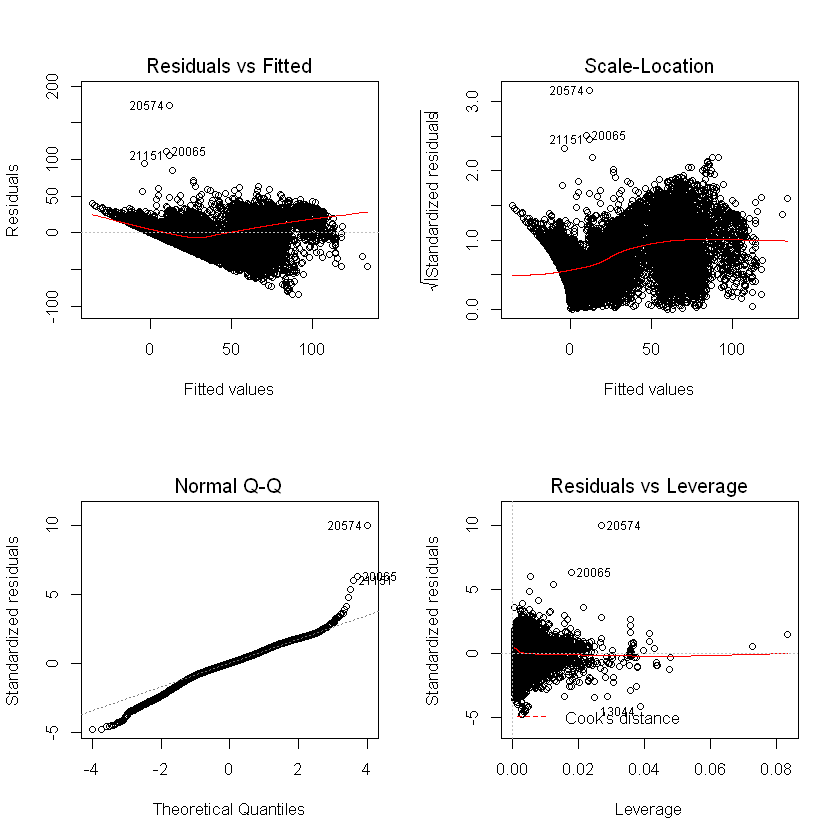

In [78]:
par(mfcol=c(2,2))
plot(fit.reg.b.bic)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [79]:
anova(fit.all, fit.reg.b.bic)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14823,4614922,-21,-20023.8,3.07165,2.690422e-06


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are more correlated as p value is less than 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

**based on Adjusted R Square**

So lets start from analysing the best model based on Adjusted R Square ie 76 predictors

In [80]:
bAdjRSelectedColumns = names(coef(fit.reg.backward,76))
# Chang in the value of '(Intercept) to critical_temp
bAdjRSelectedColumns[1] = 'critical_temp'
bAdjRSelectedColumns

[1] "critical_temp"                   "number_of_elements"             
 [3] "mean_atomic_mass"                "wtd_mean_atomic_mass"           
 [5] "gmean_atomic_mass"               "wtd_gmean_atomic_mass"          
 [7] "entropy_atomic_mass"             "wtd_entropy_atomic_mass"        
 [9] "range_atomic_mass"               "wtd_range_atomic_mass"          
[11] "std_atomic_mass"                 "wtd_std_atomic_mass"            
[13] "mean_fie"                        "wtd_mean_fie"                   
[15] "gmean_fie"                       "wtd_gmean_fie"                  
[17] "entropy_fie"                     "wtd_entropy_fie"                
[19] "range_fie"                       "wtd_range_fie"                  
[21] "std_fie"                         "mean_atomic_radius"             
[23] "wtd_mean_atomic_radius"          "wtd_gmean_atomic_radius"        
[25] "entropy_atomic_radius"           "wtd_entropy_atomic_radius"      
[27] "range_atomic_radius"             "wtd_range_atomic_radius"        
[29] "std_atomic_radius"               "wtd_std_atomic_radius"          
[31] "mean_Density"                    "gmean_Density"                  
[33] "wtd_gmean_Density"               "entropy_Density"                
[35] "wtd_entropy_Density"             "range_Density"                  
[37] "std_Density"                     "wtd_std_Density"                
[39] "mean_ElectronAffinity"           "wtd_mean_ElectronAffinity"      
[41] "gmean_ElectronAffinity"          "wtd_gmean_ElectronAffinity"     
[43] "entropy_ElectronAffinity"        "wtd_entropy_ElectronAffinity"   
[45] "range_ElectronAffinity"          "wtd_range_ElectronAffinity"     
[47] "std_ElectronAffinity"            "wtd_std_ElectronAffinity"       
[49] "mean_FusionHeat"                 "wtd_mean_FusionHeat"            
[51] "gmean_FusionHeat"                "wtd_gmean_FusionHeat"           
[53] "entropy_FusionHeat"              "wtd_entropy_FusionHeat"         
[55] "range_FusionHeat"                "wtd_range_FusionHeat"           
[57] "std_FusionHeat"                  "wtd_std_FusionHeat"             
[59] "mean_ThermalConductivity"        "wtd_mean_ThermalConductivity"   
[61] "gmean_ThermalConductivity"       "wtd_gmean_ThermalConductivity"  
[63] "entropy_ThermalConductivity"     "wtd_entropy_ThermalConductivity"
[65] "range_ThermalConductivity"       "wtd_range_ThermalConductivity"  
[67] "std_ThermalConductivity"         "mean_Valence"                   
[69] "wtd_mean_Valence"                "gmean_Valence"                  
[71] "wtd_gmean_Valence"               "entropy_Valence"                
[73] "wtd_entropy_Valence"             "range_Valence"                  
[75] "wtd_range_Valence"               "std_Valence"                    
[77] "wtd_std_Valence"

In [81]:
bAdjRTrain = train[,bAdjRSelectedColumns]
head(bAdjRTrain)

,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
18847,24.0,6,60.60051,71.50999,46.72851,55.49176,1.5674431,1.219687,122.90607,34.54220,...,3.000000,3.225625,2.667168,3.024633,1.692020,1.3798055,4,1.2375000,1.2909944,1.1334542
18895,15.5,4,57.44445,60.35930,56.06791,58.81637,1.3627753,1.035615,34.84360,29.26144,...,3.500000,3.612000,3.309751,3.405193,1.333736,0.9933449,3,1.9520000,1.1180340,1.1989395
2986,45.3,6,84.71115,78.84015,66.61372,64.69108,1.6109227,1.503995,122.90607,24.94837,...,2.166667,2.142857,2.139826,2.119268,1.778233,1.5841000,1,0.7428571,0.3726780,0.3499271
1842,94.0,7,112.95469,60.86673,82.42970,36.81151,1.7077125,1.706145,192.98100,19.45715,...,2.857143,2.383333,2.667097,2.256988,1.874063,1.5394896,3,1.0266667,1.1248583,0.9572820
3371,74.1,6,78.67813,59.21927,58.87964,36.12306,1.5198817,1.376040,192.98100,27.82682,...,2.666667,2.400667,2.492883,2.260508,1.717076,1.3702158,3,1.0646667,1.1055416,1.0198691
11638,12.9,3,49.59452,37.84410,37.11177,24.83395,0.8757052,0.877500,76.89515,19.14960,...,3.666667,3.720000,3.634241,3.690431,1.090060,0.8829809,1,1.9200000,0.4714045,0.4489989


In [82]:
fit.reg.b.adjr = lm(critical_temp~., data = bAdjRTrain)
fit.reg.b.adjr.summary = summary(fit.reg.b.adjr)
fit.reg.b.adjr.summary


Call:
lm(formula = critical_temp ~ ., data = bAdjRTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.889  -9.390   0.563  10.906 169.736 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.294e+01  5.865e+00  -3.912 9.19e-05 ***
number_of_elements              -3.171e+00  8.786e-01  -3.610 0.000308 ***
mean_atomic_mass                 8.101e-01  9.382e-02   8.634  < 2e-16 ***
wtd_mean_atomic_mass            -8.299e-01  1.139e-01  -7.285 3.38e-13 ***
gmean_atomic_mass               -4.383e-01  9.451e-02  -4.638 3.55e-06 ***
wtd_gmean_atomic_mass            5.424e-01  1.100e-01   4.930 8.33e-07 ***
entropy_atomic_mass             -3.890e+01  5.424e+00  -7.171 7.77e-13 ***
wtd_entropy_atomic_mass          7.056e+00  4.161e+00   1.696 0.089938 .  
range_atomic_mass                2.173e-01  1.977e-02  10.990  < 2e-16 ***
wtd_range_atomic_mass            3.702e-02  1.996e-02   1.855 0.063634 .  
std_atom

In [83]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.reg.b.adjr.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 76 predictors is been used"


In [84]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Backward Subset Selection Max Adjusted R Square Val - Adjusted R-Square:",round(fit.reg.b.adjr.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Backward Subset Selection Max Adjusted R Square Val - Adjusted R-Square: 0.7356"


Here we can see that the adjusted R-square is increased which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**


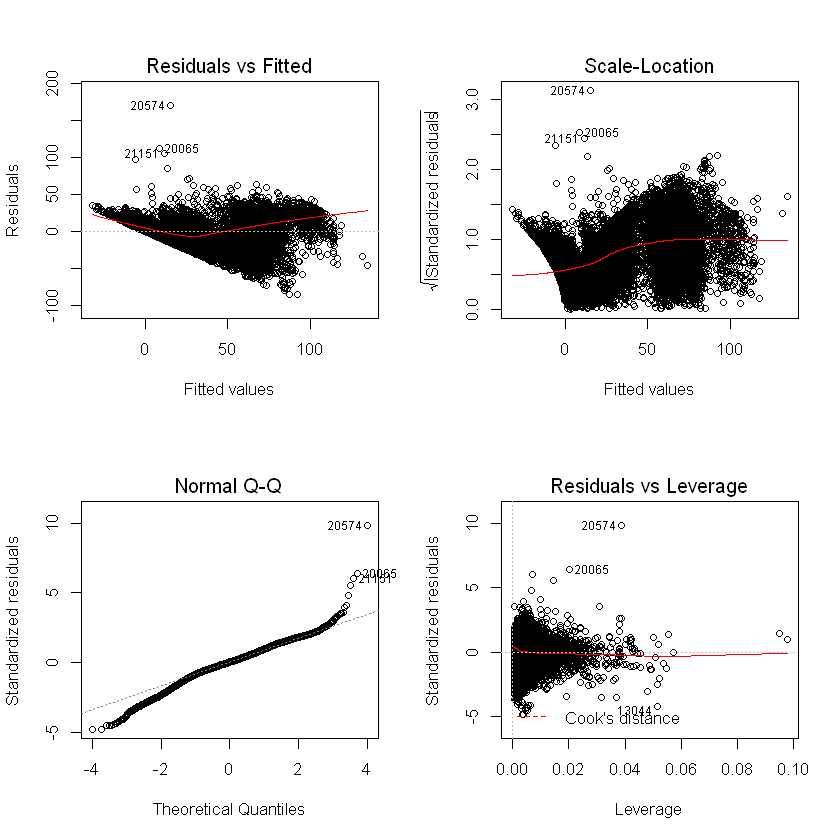

In [85]:
par(mfcol=c(2,2))
plot(fit.reg.b.adjr)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [86]:
anova(fit.all, fit.reg.b.adjr)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14807,4595301,-5,-402.2139,0.2591383,0.9353668


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are not much correlated as p value is greater than 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

**based on Cp**

In [87]:
bCpSelectedColumns = names(coef(fit.reg.backward,70))
# Changing in the value of '(Intercept) to critical_temp
bCpSelectedColumns[1] = 'critical_temp'
bCpSelectedColumns

[1] "critical_temp"                   "number_of_elements"             
 [3] "mean_atomic_mass"                "wtd_mean_atomic_mass"           
 [5] "gmean_atomic_mass"               "wtd_gmean_atomic_mass"          
 [7] "entropy_atomic_mass"             "range_atomic_mass"              
 [9] "std_atomic_mass"                 "mean_fie"                       
[11] "wtd_mean_fie"                    "gmean_fie"                      
[13] "wtd_gmean_fie"                   "entropy_fie"                    
[15] "wtd_entropy_fie"                 "range_fie"                      
[17] "wtd_range_fie"                   "std_fie"                        
[19] "mean_atomic_radius"              "wtd_mean_atomic_radius"         
[21] "wtd_gmean_atomic_radius"         "entropy_atomic_radius"          
[23] "wtd_entropy_atomic_radius"       "range_atomic_radius"            
[25] "wtd_range_atomic_radius"         "std_atomic_radius"              
[27] "wtd_std_atomic_radius"           "mean_Density"                   
[29] "gmean_Density"                   "wtd_gmean_Density"              
[31] "entropy_Density"                 "wtd_entropy_Density"            
[33] "range_Density"                   "std_Density"                    
[35] "wtd_std_Density"                 "wtd_mean_ElectronAffinity"      
[37] "gmean_ElectronAffinity"          "wtd_gmean_ElectronAffinity"     
[39] "entropy_ElectronAffinity"        "wtd_entropy_ElectronAffinity"   
[41] "range_ElectronAffinity"          "wtd_range_ElectronAffinity"     
[43] "std_ElectronAffinity"            "wtd_std_ElectronAffinity"       
[45] "mean_FusionHeat"                 "wtd_mean_FusionHeat"            
[47] "gmean_FusionHeat"                "wtd_gmean_FusionHeat"           
[49] "entropy_FusionHeat"              "wtd_entropy_FusionHeat"         
[51] "range_FusionHeat"                "wtd_range_FusionHeat"           
[53] "wtd_std_FusionHeat"              "mean_ThermalConductivity"       
[55] "wtd_mean_ThermalConductivity"    "gmean_ThermalConductivity"      
[57] "wtd_gmean_ThermalConductivity"   "entropy_ThermalConductivity"    
[59] "wtd_entropy_ThermalConductivity" "range_ThermalConductivity"      
[61] "wtd_range_ThermalConductivity"   "std_ThermalConductivity"        
[63] "mean_Valence"                    "wtd_mean_Valence"               
[65] "gmean_Valence"                   "wtd_gmean_Valence"              
[67] "entropy_Valence"                 "wtd_entropy_Valence"            
[69] "range_Valence"                   "std_Valence"                    
[71] "wtd_std_Valence"

In [88]:
bCpTrain = train[,bCpSelectedColumns]
head(bCpTrain)

,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,...,std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,std_Valence,wtd_std_Valence
18847,24.0,6,60.60051,71.50999,46.72851,55.49176,1.5674431,122.90607,40.99217,999.6000,...,39.04048,3.000000,3.225625,2.667168,3.024633,1.692020,1.3798055,4,1.2909944,1.1334542
18895,15.5,4,57.44445,60.35930,56.06791,58.81637,1.3627753,34.84360,12.36749,763.2000,...,56.41531,3.500000,3.612000,3.309751,3.405193,1.333736,0.9933449,3,1.1180340,1.1989395
2986,45.3,6,84.71115,78.84015,66.61372,64.69108,1.6109227,122.90607,47.66921,759.7167,...,142.36947,2.166667,2.142857,2.139826,2.119268,1.778233,1.5841000,1,0.3726780,0.3499271
1842,94.0,7,112.95469,60.86673,82.42970,36.81151,1.7077125,192.98100,74.49495,742.2286,...,138.42313,2.857143,2.383333,2.667097,2.256988,1.874063,1.5394896,3,1.1248583,0.9572820
3371,74.1,6,78.67813,59.21927,58.87964,36.12306,1.5198817,192.98100,62.21946,776.4167,...,141.79970,2.666667,2.400667,2.492883,2.260508,1.717076,1.3702158,3,1.1055416,1.0198691
11638,12.9,3,49.59452,37.84410,37.11177,24.83395,0.8757052,76.89515,31.41607,786.3000,...,56.84091,3.666667,3.720000,3.634241,3.690431,1.090060,0.8829809,1,0.4714045,0.4489989


In [89]:
fit.reg.b.cp = lm(critical_temp~., data = bCpTrain)
fit.reg.b.cp.summary = summary(fit.reg.b.cp)
fit.reg.b.cp.summary


Call:
lm(formula = critical_temp ~ ., data = bCpTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.670  -9.424   0.544  10.953 169.681 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.255e+01  5.810e+00  -3.881 0.000104 ***
number_of_elements              -3.138e+00  8.643e-01  -3.631 0.000284 ***
mean_atomic_mass                 7.706e-01  7.192e-02  10.715  < 2e-16 ***
wtd_mean_atomic_mass            -7.381e-01  6.231e-02 -11.844  < 2e-16 ***
gmean_atomic_mass               -4.124e-01  7.647e-02  -5.394 7.01e-08 ***
wtd_gmean_atomic_mass            4.761e-01  6.676e-02   7.131 1.04e-12 ***
entropy_atomic_mass             -3.370e+01  4.893e+00  -6.888 5.89e-12 ***
range_atomic_mass                2.137e-01  1.963e-02  10.889  < 2e-16 ***
std_atomic_mass                 -4.915e-01  5.304e-02  -9.267  < 2e-16 ***
mean_fie                         2.297e-01  5.201e-02   4.416 1.01e-05 ***
wtd_mean_f

In [90]:
# -1 to remove the row with value as intercept
print(paste("we can see that in this model around", nrow(fit.reg.b.cp.summary$coefficients)-1,"predictors is been used"))

[1] "we can see that in this model around 70 predictors is been used"


In [91]:
print(paste("All Predictors - Adjusted R-Square:",round(fit.all.summary$adj.r.squared,4)))
print(paste("Based on Min Cp Val - Adjusted R-Square:",round(fit.reg.b.cp.summary$adj.r.squared,4)))

[1] "All Predictors - Adjusted R-Square: 0.7355"
[1] "Based on Min Cp Val - Adjusted R-Square: 0.7355"


Here we can see that the adjusted R-square is decreased but only for a small amount which indicates that it might be a better model compared to original model(including all predicates) as this model is comparitively less complex

**Lets Check the various Residuals plot**

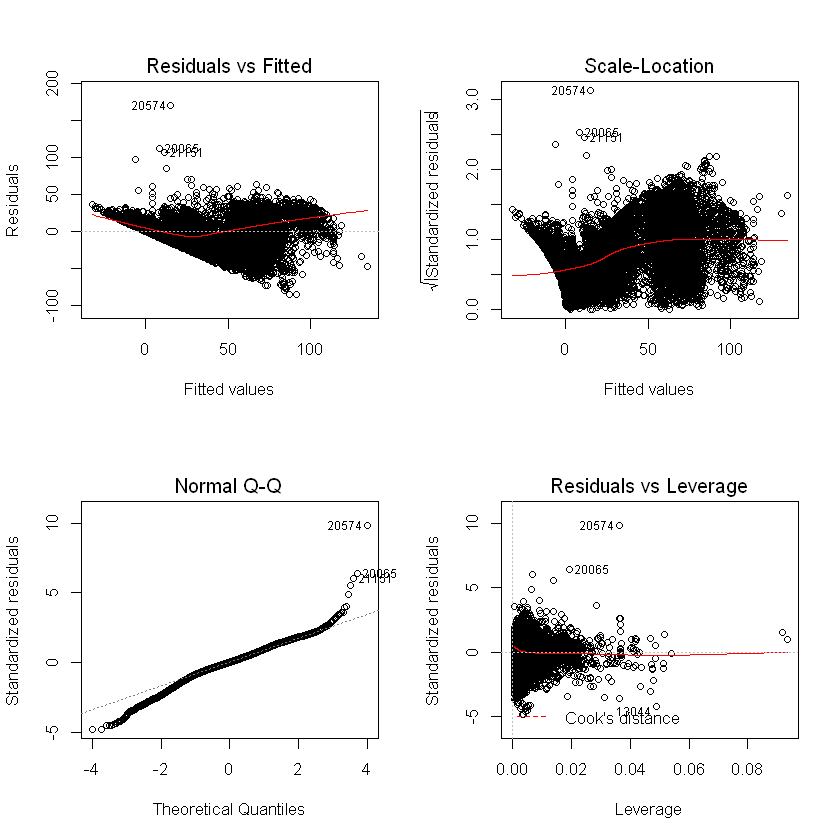

In [92]:
par(mfcol=c(2,2))
plot(fit.reg.b.cp)

Analysis on the four plots

The **residual vs fitted plot**: This plot is used to check the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. The first plot above shows that there could be a non-linear relationship between <font color='orange'>critical_temp </font>and all the predictors, as the residuals are not scattered evenly.

The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. The normal Q-Q plot shows if residuals are normally distributed. Generally It is good if residuals are lined well on the straight dashed line. In the above Plot it seems that the residuals are approximatly distributed normally

The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.

The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis. Here we care about the samples that are influential to determine the regression line. These samples can very influential even if they look to be within a reasonable range of the values. They can alter the results if we exclude them from analysis. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line. We usually use Cook’s distance, indicated by a red dash line. When samples are outside of the Cook’s distance (i.e, they have high Cook’s distance scores, Cook’s distance measures how much the entire regression function changes when the i-th case is deleted.), the samples are influential to the regression results. The regression results will be altered if we exclude those samples. Here in this plot we can barely see Cook’s distance lines because all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### Perform F-tests by comparing the two models using the anova() function

In [93]:
anova(fit.all, fit.reg.b.cp)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
14802,4594899,NA,NA,NA,NA
14813,4598388,-11,-3488.991,1.021766,0.4234977


Here with respect to the original Fit (including all predicators) we can see that in the new model the predictors are not much correlated as p value is greater than 0.05. we can also see that in the new fit the no of predictors is less compared to the original which makes it less complex. Also we can see that there is only slight increase in RSS compared to the original fit. So due to all these factors the new model looks better than the all predictors model

# Model Accuracy Analysis

## Mean Square Error 

In [94]:
print(paste("allPredictorsFit --",mean((predict(fit.all, test, type="response") - test$critical_temp)^2)))
print(paste("highlyCorrelatedTrain --",mean((predict(fit.correlated, test, type="response") - test$critical_temp)^2)))
print(paste("Backward Subset Selection(Min BIC) --",mean((predict(fit.reg.b.bic, test, type="response") - test$critical_temp)^2)))
print(paste("Backward Subset Selection(Max Adjusted R Square) --",mean((predict(fit.reg.b.adjr, test, type="response") - test$critical_temp)^2)))
print(paste("Backward Subset Selection(Min Cp) --",mean((predict(fit.reg.b.cp, test, type="response") - test$critical_temp)^2)))
print(paste("Forward Subset Selection(Min BIC) --",mean((predict(fit.reg.f.bic, test, type="response") - test$critical_temp)^2)))
print(paste("allStarredFit --",mean((predict(fit.starred, test, type="response") - test$critical_temp)^2)))
print(paste("stepBackwardFit --",mean((predict(fit.step.backward, test, type="response") - test$critical_temp)^2)))
print(paste("stepForwardFit --",mean((predict(fit.step.forward, test, type="response") - test$critical_temp)^2)))

[1] "allPredictorsFit -- 308.659073948539"
[1] "highlyCorrelatedTrain -- 407.498966463707"
[1] "Backward Subset Selection(Min BIC) -- 310.038796898743"
[1] "Backward Subset Selection(Max Adjusted R Square) -- 308.692559505932"
[1] "Backward Subset Selection(Min Cp) -- 308.808740104244"
[1] "Forward Subset Selection(Min BIC) -- 308.72306329421"
[1] "allStarredFit -- 309.09531579758"
[1] "stepBackwardFit -- 308.808740104244"
[1] "stepForwardFit -- 308.522895393448"


Here except for the highlyCorrelatedTrain all other models have almost same mean square error. So for rest of the models we can also compare its adjusted R square value and also no of predictors used to determine which is the best model.

## Adjusted R Square of Different Models

In [95]:
print(paste("allPredictorsFit --",round(fit.all.summary$adj.r.squared,4)))
print(paste("Backward Subset Selection(Min BIC) --",round(fit.reg.b.bic.summary$adj.r.squared,4)))
print(paste("Backward Subset Selection(Max Adjusted R Square) --",round(fit.reg.b.adjr.summary$adj.r.squared,4)))
print(paste("Backward Subset Selection(Min Cp) --",round(fit.reg.b.cp.summary$adj.r.squared,4)))
print(paste("Forward Subset Selection(Min BIC) --",round(fit.reg.f.bic.summary$adj.r.squared,4)))
print(paste("allStarredFit --",round(fit.starred.summary$adj.r.squared,4)))
print(paste("stepBackwardFit --",round(fit.step.backward.summary$adj.r.squared,4)))
print(paste("stepForwardFit --",round(fit.step.forward.summary$adj.r.squared,4)))

[1] "allPredictorsFit -- 0.7355"
[1] "Backward Subset Selection(Min BIC) -- 0.7347"
[1] "Backward Subset Selection(Max Adjusted R Square) -- 0.7356"
[1] "Backward Subset Selection(Min Cp) -- 0.7355"
[1] "Forward Subset Selection(Min BIC) -- 0.7352"
[1] "allStarredFit -- 0.7353"
[1] "stepBackwardFit -- 0.7355"
[1] "stepForwardFit -- 0.7354"


Here we can see that the adjusted R square values are also approximately same for all the models. So lets make a decision based on the no of predictors

## No of Predictors Used

In [96]:
print(paste("allPredictorsFit --",nrow(fit.all.summary$coefficients)-1))
print(paste("Backward Subset Selection(Min BIC) --",nrow(fit.reg.b.bic.summary$coefficients)-1))
print(paste("Backward Subset Selection(Max Adjusted R Square) --",nrow(fit.reg.b.adjr.summary$coefficients)-1))
print(paste("Backward Subset Selection(Min Cp) --",nrow(fit.reg.b.cp.summary$coefficients)-1))
print(paste("Forward Subset Selection(Min BIC) --",nrow(fit.reg.f.bic.summary$coefficients)-1))
print(paste("allStarredFit --",nrow(fit.starred.summary$coefficients)-1))
print(paste("stepBackwardFit --",nrow(fit.step.backward.summary$coefficients)-1))
print(paste("stepForwardFit --",nrow(fit.step.forward.summary$coefficients)-1))

[1] "allPredictorsFit -- 81"
[1] "Backward Subset Selection(Min BIC) -- 60"
[1] "Backward Subset Selection(Max Adjusted R Square) -- 76"
[1] "Backward Subset Selection(Min Cp) -- 70"
[1] "Forward Subset Selection(Min BIC) -- 73"
[1] "allStarredFit -- 67"
[1] "stepBackwardFit -- 70"
[1] "stepForwardFit -- 77"


Here we can see that the Model that we selected using backward subset selection and which had the min BIC value can be considered as the best model out of these models as it is more simple model compared to rest of the models. As it is able to almost predict the values with just 60 predictors

Summary of the model that we have selected is shown below

In [97]:
fit.reg.b.bic.summary


Call:
lm(formula = critical_temp ~ ., data = bBicTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.157  -9.440   0.561  10.958 173.433 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.899e+01  5.708e+00  -3.327 0.000880 ***
number_of_elements            -3.485e+00  8.522e-01  -4.090 4.33e-05 ***
mean_atomic_mass               8.318e-01  6.316e-02  13.169  < 2e-16 ***
wtd_mean_atomic_mass          -8.596e-01  5.118e-02 -16.795  < 2e-16 ***
gmean_atomic_mass             -4.434e-01  6.567e-02  -6.752 1.51e-11 ***
wtd_gmean_atomic_mass          5.653e-01  5.627e-02  10.046  < 2e-16 ***
entropy_atomic_mass           -3.705e+01  4.712e+00  -7.862 4.03e-15 ***
range_atomic_mass              2.138e-01  1.903e-02  11.233  < 2e-16 ***
std_atomic_mass               -4.936e-01  5.156e-02  -9.575  < 2e-16 ***
mean_fie                       2.576e-01  4.801e-02   5.365 8.22e-08 ***
wtd_mean_fie                  -

Based on This The subset of Attributes That act as most significant are:

In [110]:
coef(fit.reg.b.bic.summary)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.898970e+01,5.707739e+00,-3.327010,8.799685e-04
number_of_elements,-3.485466e+00,8.521721e-01,-4.090097,4.334717e-05
mean_atomic_mass,8.318261e-01,6.316356e-02,13.169398,2.190451e-39
wtd_mean_atomic_mass,-8.595754e-01,5.117994e-02,-16.795163,1.005736e-62
gmean_atomic_mass,-4.434414e-01,6.567111e-02,-6.752458,1.507671e-11
wtd_gmean_atomic_mass,5.652504e-01,5.626547e-02,10.046133,1.137461e-23
entropy_atomic_mass,-3.704529e+01,4.711674e+00,-7.862448,4.025357e-15
range_atomic_mass,2.138135e-01,1.903431e-02,11.233056,3.680340e-29
std_atomic_mass,-4.936423e-01,5.155537e-02,-9.574993,1.176704e-21
mean_fie,2.575825e-01,4.801293e-02,5.364858,8.222986e-08
